# Movie Trend Analysis Using IMDb and Rotten Tomatoes Data
## Problem Statement
Data-driven decisions on movie productions, marketing strategies, and audience development have highly influenced film production. The two most commonly used platforms for user and critic ratings of movies are IMDb and Rotten Tomatoes, respectively.
This project aims to analyze the trends in movie ratings from the different platforms they were released on and to identify key factors determining movie success. We do this by answering important questions like:

- What is the pattern of user and critic ratings with respect to audience and critical preferences?
- How do ratings change over time regarding genre, budget, and release platform, such as Netflix or theaters?
By understanding such trends, our project hopes to shed light on how stakeholders in the film industry-production companies and streaming platforms-can make use of this data to inform decisions.

## Contribution

The trend analysis in movies on both IMDb and Rotten Tomatoes will help in ascertaining which aspect drives audience and critical reception. This can be used by producers to predict the success of a movie and help inform choices relating to how marketing and casting is done and also on the production budget. Knowing the divergence between critics and audience opinion creates the right way to create contents that target variable portions of movie-goers.


## Hypothesis Questions
### Team Mate 1: Yasaswi Raj Madari (50608811)
1. **How do the genres change over time based on IMDb ratings?**

2. **Which genre has been consistent among audiences?**

### Team Mate 2: Aravind Mohan (50611294)
3. **Movies with better critic rankings tend to have better audience ratings as properly. We've already visualized this relationship and calculated the correlation between critic rankings and common ratings**

4. **Audience Ratings Differ Based on the Genre Objective: To examine if positive genres get constantly higher or lower audience scores compared to others. code follows below**

### Team Mate 3: Teja Chalikanti (50579526)
5. **Movies with a higher number of votes (numVotes) have higher average ratings (averageRating)**

6. **Movies with sub-genres (i.e., movies belonging to multiple genres) tend to have better audienceRating compared to movies with only one genre**

### Team Mate 4: Sai Kumar Domakonda (50604883)
7. **Do well-known directors (as measured by audience vote counts) receive higher and more consistent IMDb ratings compared to less popular directors**

8. **Do longer runtime movies receive more audience engagement**


## Data Retrival
We retrive the data from the imdb provided data sets using pd read csv and scrape the data using beautifulsoup for rotten tomatoes data.

Below is the code we used to scrape the data 
```python
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

def format_movie_title_for_url(title):
    title = title.replace('&', 'and') 
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    title = title.replace(' ', '_').lower() 
    return title

def scrape_voter_count(movie_title):
    base_url = "https://www.rottentomatoes.com/m/"
    formatted_title = format_movie_title_for_url(movie_title)
    url = base_url + formatted_title
    headers = {'User-Agent': 'Mozilla/5.0'}

    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Error fetching {movie_title}: Status code {response.status_code}")
            return None

        soup = BeautifulSoup(response.text, 'html.parser')

        critics_review_link = soup.find('rt-link', {'slot': 'criticsReviews'})
        if critics_review_link:
            voter_count_text = critics_review_link.text.strip()
            voter_count = re.search(r'\d+', voter_count_text)
            if voter_count:
                voter_count = voter_count.group()
                return voter_count

        print(f"No valid voter count found for {movie_title}")
        return None

    except Exception as e:
        print(f"Error scraping {movie_title}: {e}")
        return None

final_dataset_cleaned['voterCount'] = None

valid_rows = final_dataset_cleaned.loc[
    final_dataset_cleaned['criticsRating'].notna() &
    (final_dataset_cleaned['criticsRating'] != 'None') &
    (final_dataset_cleaned['criticsRating'] != '')
]

unsuccessful_count = 0
for index, row in valid_rows.iterrows():
    movie_title = row['originalTitle']
    voter_count = scrape_voter_count(movie_title)

    if voter_count is not None:
        final_dataset_cleaned.at[index, 'voterCount'] = voter_count
    else:
        unsuccessful_count += 1

print(f"Number of unsuccessful web scraping attempts: {unsuccessful_count}")

print(final_dataset_cleaned[['originalTitle', 'criticsRating', 'voterCount']].head(20))
```
```python
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

def format_movie_title_for_url(title):
    title = title.replace('&', 'and')
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)
    title = title.replace(' ', '_').lower()
    return title

def scrape_rotten_tomatoes(movie_title):
    base_url = "https://www.rottentomatoes.com/m/"
    formatted_title = format_movie_title_for_url(movie_title)
    url = base_url + formatted_title
    headers = {'User-Agent': 'Mozilla/5.0'}

    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 404:
            print(f"Error fetching {movie_title}: Status code 404 (Page not found)")
            return None, Noneimport seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='averageRating', data=genres_expanded)
plt.xticks(rotation=90)
plt.title('IMDb Rating Distribution by Genre')
plt.xlabel('Genres')
plt.ylabel('Average IMDb Rating')
plt.show()

        elif response.status_code != 200:
            print(f"Error fetching {movie_title}: Status code {response.status_code}")
            return None, None

        soup = BeautifulSoup(response.text, 'html.parser')

        critic_score_button = soup.find('rt-button', {'slot': 'criticsScore'})
        critic_score = None
        if critic_score_button:
            critic_score = critic_score_button.get_text(strip=True)

        audience_score_button = soup.find('rt-button', {'slot': 'audienceScore'})
        audience_score = None
        if audience_score_button:
            audience_score = audience_score_button.get_text(strip=True)

        if not critic_score and not audience_score:
            print(f"No valid score found for {movie_title}")
            return None, None

        return critic_score, audience_score

    except Exception as e:
        print(f"Error scraping {movie_title}: {e}")
        return None, None

final_dataset_cleaned['criticsRating'] = None
final_dataset_cleaned['audienceRating'] = None

movies_after_2010 = final_dataset_cleaned[final_dataset_cleaned['startYear'] > '2010']

unsuccessful_count = 0
for index, row in movies_after_2010.iterrows():
    movie_title = row['originalTitle']
    critics_rating, audience_rating = scrape_rotten_tomatoes(movie_title)

    if critics_rating is not None and audience_rating is not None:
        final_dataset_cleaned.at[index, 'criticsRating'] = critics_rating
        final_dataset_cleaned.at[index, 'audienceRating'] = audience_rating
    else:
        unsuccessful_count += 1

print(f"Number of unsuccessful web scraping attempts: {unsuccessful_count}")

print(final_dataset_cleaned.head(20))

final_dataset_cleaned.to_csv('updated_dataset_with_rt_ratings.csv', index=False)
```

## Data Cleaning Steps Overview

### Filtering for Specific Criteria
- **Language Filtering**: Focused the analysis on movies with the English language (`language == 'en'`).
- **Year Filtering**: Considered movies released after the year 2000 to analyze recent trends.
- **Region Filtering**: Retained only movies from specified regions like UK and US to maintain relevance.

### Data Merging
- **Merged Datasets**: Combined multiple IMDb datasets (titles, crew, ratings) to gather key details such as ratings, directors, and genres.
- **Cleaned Version**: Retained essential columns like `tconst`, `originalTitle`, `startYear`, `genres`, and `averageRating` to focus on important information.

### Handling Missing Values
- **Dropping Rows**: Removed rows with missing values in critical columns like `originalTitle`, `startYear`, and `averageRating`.
- **Replacing Invalid Values**: Addressed non-numeric runtime values by replacing them with suitable defaults or corrected entries.

### Formatting and Data Types
- **Runtime Conversion**: Converted `runtimeMinutes` to numeric using `pd.to_numeric`, managing invalid values.
- **Date Standardization**: Cleaned `startYear` using `pd.to_datetime` to ensure consistent year formats.
- **Rotten Tomatoes Formatting**: Processed titles for Rotten Tomatoes scraping by handling special characters and spaces.

### Removing Duplicates
- **Duplicate Removal**: Removed duplicate entries based on `originalTitle` to avoid multiple listings of the same movie.
- **Verification**: Checked for duplicates and ensured only unique entries remained in the cleaned dataset.

### Handling Rotten Tomatoes Ratings
- **Scraping Ratings**: Extracted critics and audience ratings from Rotten Tomatoes, updating the dataset with new values.
- **Filtering Valid Scores**: Included only valid critic and audience ratings by excluding entries with 'None' or empty values.
- **Converting Percentages**: Converted percentage strings (e.g., '83%') into numeric values for easier analysis.

### Handling Genre Data
- **Genre Splitting**: Separated multi-genre entries into individual genres using the `explode` method.
- **One-Hot Encoding**: Created a one-hot encoded version of genres for better correlation analysis.
- **Single-Genre Focus**: Concentrated on single-genre movies for a more straightforward correlation study between ratings and genres.

### Filtering for Valid Ratings
- **Valid Ratings Filtering**: Excluded rows with missing or invalid ratings, such as `criticsRating` or `audienceRating`.
- **Ensured Clean Entries**: Used conditions like `notna()` and `.str.strip()` to ensure valid entries for ratings.

### Validation and Final Cleanup
- **Region Validation**: Verified entries for expected regions and corrected any anomalies.
- **Feature-Length Movies**: Filtered out movies with a runtime of less than 60 minutes to focus on feature-length films.
- **Final Null Check**: Conducted a final review for null values across columns to ensure data quality.


In [12]:
import pandas as pd

# Load the dataset
file_path = 'Datasets/title.akas.tsv' 
df = pd.read_csv(file_path, sep='\t', dtype=str)

# Filter titles with language 'en'
df_filtered = df[df['language'] == 'en']

# Display the filtered data
print(df_filtered.head())

       titleId ordering                                title region language  \
37   tt0000005        2                     Blacksmith Scene     CA       en   
88   tt0000010        2  La sortie de l'usine Lumière à Lyon     CA       en   
119  tt0000012       21  The Arrival of a Train at La Ciotat    XWW       en   
129  tt0000012        4               The Arrival of a Train    XEU       en   
131  tt0000012        6               The Arrival of a Train    XWW       en   

           types attributes isOriginalTitle  
37   imdbDisplay         \N               0  
88   imdbDisplay         \N               0  
119  alternative         \N               0  
129  imdbDisplay         \N               0  
131  imdbDisplay         \N               0  


In [4]:
print(df_filtered.info())


<class 'pandas.core.frame.DataFrame'>
Index: 554932 entries, 37 to 49827960
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   titleId          554932 non-null  object
 1   ordering         554932 non-null  object
 2   title            554930 non-null  object
 3   region           554932 non-null  object
 4   language         554932 non-null  object
 5   types            554932 non-null  object
 6   attributes       554932 non-null  object
 7   isOriginalTitle  554932 non-null  object
dtypes: object(8)
memory usage: 38.1+ MB
None


In [7]:
print(df_filtered['title'].isnull().sum())

2


In [5]:
df_filtered = df_filtered.dropna(subset=['title'])

In [6]:
print(df_filtered['title'].isnull().sum())

0


In [9]:
def format_title_for_rt(title):
    return title.lower().replace(' ', '-')


df_filtered['rt_title'] = df_filtered['title'].apply(format_title_for_rt)

In [10]:
# Group by titleId and keep the first occurrence of each unique titleId
df_cleaned = df_filtered.groupby('titleId', as_index=False).first()
print(df_cleaned)

          titleId ordering                                        title  \
0       tt0000005        2                             Blacksmith Scene   
1       tt0000010        2          La sortie de l'usine Lumière à Lyon   
2       tt0000012       21          The Arrival of a Train at La Ciotat   
3       tt0000013        4  The Photographical Congress Arrives in Lyon   
4       tt0000016        4                        Boat Leaving the Port   
...           ...      ...                                          ...   
302674  tt9916216        2                 Kalyanam Mudhal Kadhal Varai   
302675  tt9916362       11                             Coven of Sisters   
302676  tt9916428        4                          The Secret of China   
302677  tt9916634        2                                       Eugène   
302678  tt9916706        2                              Dankyavar Danka   

       region language        types attributes isOriginalTitle  \
0          CA       en  imdbDispl

In [24]:

akas = pd.read_csv('https://datasets.imdbws.com/title.akas.tsv.gz', sep='\t', compression='gzip',low_memory= False)
titles = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep='\t', compression='gzip', low_memory= False)
crew = pd.read_csv('https://datasets.imdbws.com/title.crew.tsv.gz', sep='\t', compression='gzip', low_memory= False)
ratings = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep='\t', compression='gzip', low_memory= False)
names = pd.read_csv('https://datasets.imdbws.com/name.basics.tsv.gz', sep='\t', compression='gzip', low_memory= False)

#Filter for English movies released after 2000
titles_filtered = titles[(titles['startYear'] > '2010') & 
                         (titles['titleType'] == 'movie')]

# Filter for English language movies (handling NaN values)
english_movies = titles_filtered[titles_filtered['originalTitle'].str.contains('[a-zA-Z]', regex=True, na=False)]

# Include only movies from the specified regions

akas_filtered = akas[akas['region'].isin(['UK', 'US'])]  # 'IN' for India in IMDb region codes
akas_filtered = akas_filtered[['titleId', 'region', 'isOriginalTitle']]  # Select only necessary columns


english_movies = english_movies.merge(akas_filtered, left_on='tconst', right_on='titleId', how='left')

# Step 4: Merge with crew and ratings datasets
merged_data = english_movies.merge(crew, left_on='tconst', right_on='tconst', how='left')
merged_data = merged_data.merge(ratings, left_on='tconst', right_on='tconst', how='left')

merged_data = merged_data.explode('directors')
merged_data = merged_data.merge(names, left_on='directors', right_on='nconst', how='left')

# Step 6:final dataset
final_dataset = merged_data[['tconst', 'originalTitle', 'startYear', 'genres', 'runtimeMinutes', 
                             'primaryName', 'averageRating', 'numVotes', 'isOriginalTitle', 'isAdult', 'region']]
final_dataset.rename(columns={'primaryName': 'director'}, inplace=True)

# Step 7: Cleaning up the final dataset
# 
final_dataset['runtimeMinutes'] = pd.to_numeric(final_dataset['runtimeMinutes'], errors='coerce').fillna(0).astype(int)

# Step 8: Remove NaN values
final_dataset_cleaned = final_dataset.dropna()


print(final_dataset_cleaned.head())


/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/425192187.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.rename(columns={'primaryName': 'director'}, inplace=True)
/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/425192187.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['runtimeMinutes'] = pd.to_numeric(final_dataset['runtimeMinutes'], errors='coerce').fillna(0).astype(int)


       tconst               originalTitle startYear  \
4   tt0069049  The Other Side of the Wind      2018   
16  tt0112502                     Bigfoot      2017   
17  tt0116991         Mariette in Ecstasy      2019   
18  tt0120589                Predestinado      2022   
55  tt0137204             Joe Finds Grace      2017   

                        genres  runtimeMinutes           director  \
4                        Drama             122       Orson Welles   
16             Horror,Thriller               0           Mc Jones   
17                       Drama             101        John Bailey   
18             Biography,Drama             108  Gustavo Fernández   
55  Adventure,Animation,Comedy              83   Anthony Harrison   

    averageRating  numVotes  isOriginalTitle isAdult region  
4             6.7    8156.0              0.0       0     US  
16            4.7      42.0              0.0       0     US  
17            7.1      81.0              0.0       0     US  
18    

In [15]:

final_dataset_cleaned = final_dataset_cleaned.drop_duplicates()

print(final_dataset_cleaned.head())


       tconst                originalTitle startYear                  genres  \
4   tt0035423               Kate & Leopold      2001  Comedy,Fantasy,Romance   
7   tt0036606  Another Time, Another Place      1983               Drama,War   
9   tt0038687           Let There Be Light      1980         Documentary,War   
12  tt0042423        The Dungeon of Harrow      1964                  Horror   
14  tt0044932            Out of the Shadow      1961                 Mystery   

    runtimeMinutes         director  averageRating  numVotes  isOriginalTitle  \
4              118    James Mangold            6.4   90221.0              0.0   
7              118  Michael Radford            6.4     362.0              0.0   
9               58      John Huston            7.5    2048.0              0.0   
12              86      Pat Boyette            3.4     646.0              0.0   
14              61   Michael Winner            5.0     240.0              0.0   

   isAdult region  
4        0  

In [20]:
print(final_dataset_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 119154 entries, 4 to 394770
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           119154 non-null  object 
 1   originalTitle    119154 non-null  object 
 2   startYear        119154 non-null  object 
 3   genres           119154 non-null  object 
 4   runtimeMinutes   119154 non-null  int64  
 5   director         119154 non-null  object 
 6   averageRating    119154 non-null  float64
 7   numVotes         119154 non-null  float64
 8   isOriginalTitle  119154 non-null  float64
 9   isAdult          119154 non-null  object 
 10  region           119154 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 10.9+ MB
None


In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd

# Helper function to format movie title for Rotten Tomatoes URL
def format_movie_title_for_url(title):
    title = title.replace('&', 'and')  # Replace '&' with 'and'
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)  # Remove special characters
    title = title.replace(' ', '_').lower()       # Replace spaces with underscores and make lowercase
    return title

# Function to scrape critic rating and audience rating from Rotten Tomatoes
def scrape_rotten_tomatoes(movie_title):
    base_url = "https://www.rottentomatoes.com/m/"
    formatted_title = format_movie_title_for_url(movie_title)
    url = base_url + formatted_title
    headers = {'User-Agent': 'Mozilla/5.0'}

    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 404:
            print(f"Error fetching {movie_title}: Status code 404 (Page not found)")
            return None, None
        elif response.status_code != 200:
            print(f"Error fetching {movie_title}: Status code {response.status_code}")
            return None, None

        soup = BeautifulSoup(response.text, 'html.parser')

        # Try to extract critic score
        critic_score_button = soup.find('rt-button', {'slot': 'criticsScore'})
        critic_score = None
        if critic_score_button:
            critic_score = critic_score_button.get_text(strip=True)

        # Try to extract audience score
        audience_score_button = soup.find('rt-button', {'slot': 'audienceScore'})
        audience_score = None
        if audience_score_button:
            audience_score = audience_score_button.get_text(strip=True)

        # If nothing is found, return None values
        if not critic_score and not audience_score:
            print(f"No valid score found for {movie_title}")
            return None, None

        return critic_score, audience_score

    except Exception as e:
        print(f"Error scraping {movie_title}: {e}")
        return None, None



# Add new columns for critic ratings and audience ratings
final_dataset_cleaned['criticsRating'] = None
final_dataset_cleaned['audienceRating'] = None

# Filter for movies released after 2010 (modify this as needed)
movies_after_2010 = final_dataset_cleaned[final_dataset_cleaned['startYear'] > '2010']

# Scrape Rotten Tomatoes for each movie (limit to first 20 for testing)
unsuccessful_count = 0  # Initialize counter for unsuccessful scrapes
for index, row in movies_after_2010.iterrows():
    movie_title = row['originalTitle']
    critics_rating, audience_rating = scrape_rotten_tomatoes(movie_title)

    if critics_rating is not None and audience_rating is not None:
        final_dataset_cleaned.at[index, 'criticsRating'] = critics_rating
        final_dataset_cleaned.at[index, 'audienceRating'] = audience_rating
    else:
        unsuccessful_count += 1  # Increment the counter for unsuccessful scrapes

# Display the count of unsuccessful scrapes
print(f"Number of unsuccessful web scraping attempts: {unsuccessful_count}")

# Display the updated dataset (optional)
print(final_dataset_cleaned.head(20))

# Save the updated dataset to a CSV (optional)
final_dataset_cleaned.to_csv('updated_dataset_with_rt_ratings.csv', index=False)


In [34]:
print(final_dataset_cleaned['criticsRating'])

4          83%
16            
17        None
18        None
55        None
          ... 
356455    None
356460    None
356464    None
356466    None
356467    None
Name: criticsRating, Length: 77880, dtype: object


In [36]:
print(final_dataset_cleaned[final_dataset_cleaned['criticsRating'].notna()].count())

tconst             721
originalTitle      721
startYear          721
genres             721
runtimeMinutes     721
director           721
averageRating      721
numVotes           721
isOriginalTitle    721
isAdult            721
region             721
criticsRating      721
voterCount           1
audienceRating     721
dtype: int64


In [38]:
print(final_dataset_cleaned[final_dataset_cleaned['criticsRating'] != 'None'])

           tconst                  originalTitle startYear  \
4       tt0069049     The Other Side of the Wind      2018   
16      tt0112502                        Bigfoot      2017   
17      tt0116991            Mariette in Ecstasy      2019   
18      tt0120589                   Predestinado      2022   
55      tt0137204                Joe Finds Grace      2017   
...           ...                            ...       ...   
356455  tt9915872  Boku no kanojo wa mahoutsukai      2019   
356460  tt9916170                       O Ensaio      2019   
356464  tt9916190                      Safeguard      2020   
356466  tt9916362                       Akelarre      2020   
356467  tt9916428   Hong xing zhao yao Zhong guo      2019   

                            genres  runtimeMinutes           director  \
4                            Drama             122       Orson Welles   
16                 Horror,Thriller               0           Mc Jones   
17                           Drama  

In [39]:
print(final_dataset_cleaned.loc[final_dataset_cleaned['criticsRating'] != 'None', 'criticsRating'])

4          83%
16            
17        None
18        None
55        None
          ... 
356455    None
356460    None
356464    None
356466    None
356467    None
Name: criticsRating, Length: 77880, dtype: object


In [43]:
print(final_dataset_cleaned.loc[final_dataset_cleaned['criticsRating'].notna() & (final_dataset_cleaned['criticsRating'] != 'None') & (final_dataset_cleaned['criticsRating'] != ''), 'criticsRating'])


4         83%
240       80%
241       47%
242       47%
243       47%
         ... 
150270    75%
150271    75%
150313    47%
150332    65%
150333    65%
Name: criticsRating, Length: 7080, dtype: object


In [45]:
count = final_dataset_cleaned.loc[final_dataset_cleaned['audienceRating'].notna() & (final_dataset_cleaned['audienceRating'] != 'None') & (final_dataset_cleaned['audienceRating'] != '')].shape[0]
print(f"Count of valid critics ratings: {count}")

Count of valid critics ratings: 10842


In [46]:
print(final_dataset_cleaned.loc[final_dataset_cleaned['audienceRating'].notna() & (final_dataset_cleaned['audienceRating'] != 'None') & (final_dataset_cleaned['audienceRating'] != ''), 'audienceRating'])

4         58%
16        26%
116       86%
202       11%
233       38%
         ... 
150322    40%
150324    40%
150329    14%
150332    82%
150333    82%
Name: audienceRating, Length: 10842, dtype: object


In [47]:
final_dataset_cleaned.head(100)

tconst               originalTitle startYear  \
4    tt0069049  The Other Side of the Wind      2018   
16   tt0112502                     Bigfoot      2017   
17   tt0116991         Mariette in Ecstasy      2019   
18   tt0120589                Predestinado      2022   
55   tt0137204             Joe Finds Grace      2017   
..         ...                         ...       ...   
404  tt0433035                  Real Steel      2011   
405  tt0433035                  Real Steel      2011   
406  tt0433035                  Real Steel      2011   
407  tt0433397                       Satin      2011   
408  tt0433397                       Satin      2011   

                         genres  runtimeMinutes            director  \
4                         Drama             122        Orson Welles   
16              Horror,Thriller               0            Mc Jones   
17                        Drama             101         John Bailey   
18              Biography,Drama             108   Gustavo Fernández   
55   Adventure,Animation,Comedy              83    Anthony Harrison   
..                          ...             ...                 ...   
404         Action,Drama,Sci-Fi             127          Shawn Levy   
405         Action,Drama,Sci-Fi             127          Shawn Levy   
406         Action,Drama,Sci-Fi             127          Shawn Levy   
407          Comedy,Drama,Music              84  Christopher Olness   
408          Comedy,Drama,Music              84  Christopher Olness   

     averageRating  numVotes  isOriginalTitle isAdult region criticsRating  \
4              6.7    8156.0              0.0       0     US           83%   
16             4.7      42.0              0.0       0     US                 
17             7.1      81.0              0.0       0     US          None   
18             7.2     417.0              0.0       0     US          None   
55             8.6     294.0              0.0       0     US          None   
..             ...       ...              ...     ...    ...           ...   
404            7.1  362971.0              0.0       0     US           60%   
405            7.1  362971.0              0.0       0     US           60%   
406            7.1  362971.0              0.0       0     US           60%   
407            4.5     272.0              0.0       0     US                 
408            4.5     272.0              0.0       0     US                 

    voterCount audienceRating  
4           99            58%  
16        None            26%  
17        None           None  
18        None           None  
55        None           None  
..         ...            ...  
404       None            73%  
405       None            73%  
406       None            73%  
407       None            59%  
408       None            59%  

[100 rows x 14 columns]

In [51]:
duplicates = final_dataset_cleaned[final_dataset_cleaned['originalTitle'].duplicated()]

# Print the duplicates
print(duplicates)
duplicate_count = final_dataset_cleaned['originalTitle'].duplicated().sum()
print(f"Number of duplicate titles: {duplicate_count}")

           tconst          originalTitle startYear                genres  \
148     tt0191010  Heartland of Darkness      2022                Horror   
169     tt0202523     The Perfect Shadow      2024                 Drama   
234     tt0285252         Life's a Beach      2012                Comedy   
235     tt0285252         Life's a Beach      2012                Comedy   
236     tt0285252         Life's a Beach      2012                Comedy   
...           ...                    ...       ...                   ...   
356258  tt9899880               Columbus      2018          Comedy,Drama   
356279  tt9900940           The Scrapper      2021  Crime,Drama,Thriller   
356418  tt9913936               Paradise      2019           Crime,Drama   
356419  tt9913936               Paradise      2019           Crime,Drama   
356431  tt9914642              Albatross      2017           Documentary   

        runtimeMinutes              director  averageRating  numVotes  \
148           

In [52]:
#cleaning:
# Remove duplicates based on 'originalTitle', keeping first occurrence
final_dataset_cleaned = final_dataset_cleaned.drop_duplicates(subset='originalTitle', keep='first')

# Check the result
print(f"Number of rows after removing duplicates: {final_dataset_cleaned.shape[0]}")


Number of rows after removing duplicates: 67904


In [53]:
print(final_dataset_cleaned.loc[final_dataset_cleaned['audienceRating'].notna() & (final_dataset_cleaned['audienceRating'] != 'None') & (final_dataset_cleaned['audienceRating'] != ''), 'audienceRating'])

4         58%
16        26%
116       86%
202       11%
233       38%
         ... 
150320    77%
150322    40%
150324    40%
150329    14%
150332    82%
Name: audienceRating, Length: 8546, dtype: object


In [54]:
print(final_dataset_cleaned.loc[final_dataset_cleaned['criticsRating'].notna() & (final_dataset_cleaned['criticsRating'] != 'None') & (final_dataset_cleaned['criticsRating'] != ''), 'criticsRating'])


4         83%
240       80%
241       47%
259       56%
262       41%
         ... 
150237    33%
150242     0%
150269    75%
150313    47%
150332    65%
Name: criticsRating, Length: 5455, dtype: object


In [55]:
print(final_dataset_cleaned.isnull().sum())


tconst                 0
originalTitle          0
startYear              0
genres                 0
runtimeMinutes         0
director               0
averageRating          0
numVotes               0
isOriginalTitle        0
isAdult                0
region                 0
criticsRating      58645
voterCount         67903
audienceRating     58645
dtype: int64


In [56]:

final_dataset_cleaned = final_dataset_cleaned[final_dataset_cleaned['runtimeMinutes'] >= 60]

In [57]:
#validation and correcting starting
final_dataset_cleaned['startYear'] = pd.to_datetime(final_dataset_cleaned['startYear'], format='%Y', errors='coerce')

In [58]:
#validation
valid_regions = ['US', 'UK']


invalid_regions = final_dataset_cleaned[~final_dataset_cleaned['region'].isin(valid_regions)]

if not invalid_regions.empty:
    print("Invalid regions found:")
    print(invalid_regions[['originalTitle', 'region']])
else:
    print("All regions are valid.")

# Filter dataset to only keep valid regions
final_dataset_cleaned = final_dataset_cleaned[final_dataset_cleaned['region'].isin(valid_regions)]



All regions are valid.


In [60]:
final_dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60893 entries, 4 to 356466
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   tconst           60893 non-null  object        
 1   originalTitle    60893 non-null  object        
 2   startYear        60885 non-null  datetime64[ns]
 3   genres           60893 non-null  object        
 4   runtimeMinutes   60893 non-null  int64         
 5   director         60893 non-null  object        
 6   averageRating    60893 non-null  float64       
 7   numVotes         60893 non-null  float64       
 8   isOriginalTitle  60893 non-null  float64       
 9   isAdult          60893 non-null  object        
 10  region           60893 non-null  object        
 11  criticsRating    8971 non-null   object        
 12  voterCount       1 non-null      object        
 13  audienceRating   8971 non-null   object        
 14  genres_list      60893 non-null  object   

In [67]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd


def format_movie_title_for_url(title):
    title = title.replace('&', 'and')  # Replace '&' with 'and'
    title = re.sub(r'[^a-zA-Z0-9\s]', '', title)  # Remove special characters
    title = title.replace(' ', '_').lower()       # Replace spaces with underscores and make lowercase
    return title

# Function to scrape voter count from Rotten Tomatoes based on HTML structure from image
def scrape_voter_count(movie_title):
    base_url = "https://www.rottentomatoes.com/m/"
    formatted_title = format_movie_title_for_url(movie_title)
    url = base_url + formatted_title
    headers = {'User-Agent': 'Mozilla/5.0'}

    try:
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            print(f"Error fetching {movie_title}: Status code {response.status_code}")
            return None

        soup = BeautifulSoup(response.text, 'html.parser')

        # Get the voter count from criticsReviews section
        critics_review_link = soup.find('rt-link', {'slot': 'criticsReviews'})
        if critics_review_link:
            voter_count_text = critics_review_link.text.strip()
            voter_count = re.search(r'\d+', voter_count_text)
            if voter_count:
                voter_count = voter_count.group()
                return voter_count

        # If no valid voter count found
        print(f"No valid voter count found for {movie_title}")
        return None

    except Exception as e:
        print(f"Error scraping {movie_title}: {e}")
        return None

final_dataset_cleaned['voterCount'] = None

valid_rows = final_dataset_cleaned.loc[
    final_dataset_cleaned['criticsRating'].notna() &
    (final_dataset_cleaned['criticsRating'] != 'None') &
    (final_dataset_cleaned['criticsRating'] != '')
]

unsuccessful_count = 0  # Initialize counter for unsuccessful scrapes
for index, row in valid_rows.iterrows():
    movie_title = row['originalTitle']
    voter_count = scrape_voter_count(movie_title)

    if voter_count is not None:
        final_dataset_cleaned.at[index, 'voterCount'] = voter_count
    else:
        unsuccessful_count += 1  # Increment the counter for unsuccessful scrapes

# Display the count of unsuccessful scrapes
print(f"Number of unsuccessful web scraping attempts: {unsuccessful_count}")

# Display the updated dataset
print(final_dataset_cleaned[['originalTitle', 'criticsRating', 'voterCount']].head(20))


No valid voter count found for Maidaan
No valid voter count found for Fetih 1453
Number of unsuccessful web scraping attempts: 2
                                         originalTitle criticsRating  \
4                           The Other Side of the Wind           83%   
17                                 Mariette in Ecstasy          None   
18                                        Predestinado          None   
55                                     Joe Finds Grace          None   
58   Housesitter: The Night They Saved Siegfried's ...          None   
116                 Cooper and Hemingway: The True Gen                 
118                                          Nine Ball          None   
126                                         Blood Type          None   
130                                Az ember tragédiája          None   
147                              Heartland of Darkness          None   
151                                     Reverse Heaven          None   
160    

In [68]:
print(final_dataset_cleaned.loc[final_dataset_cleaned['voterCount'].notna() & (final_dataset_cleaned['voterCount'] != 'None') & (final_dataset_cleaned['voterCount'] != ''), 'voterCount'])

4          99
240         5
241        45
259         9
262        44
         ... 
150237    214
150242      5
150269     12
150313     19
150332     37
Name: voterCount, Length: 5334, dtype: object


In [69]:
final_dataset_cleaned.to_csv('cleaned_movies_dataset.csv', index=False)


In [78]:
import pandas as pd
filtered_critics_df = final_dataset_cleaned[
    final_dataset_cleaned['criticsRating'].notna() & 
    (final_dataset_cleaned['criticsRating'] != 'None') & 
    (final_dataset_cleaned['criticsRating'].str.strip() != '')
]

filtered_critics_df['criticsRating_numeric'] = filtered_critics_df['criticsRating'].str.replace('%', '').astype(float
# Display the updated DataFrame to verify the changes
print(filtered_critics_df[['criticsRating', 'criticsRating_numeric']].head())
print(f"Filtered dataset now contains {len(filtered_critics_df)} entries with valid critics ratings.")


    criticsRating  criticsRating_numeric
4             83%                   83.0
240           80%                   80.0
241           47%                   47.0
259           56%                   56.0
262           41%                   41.0
Filtered dataset now contains 5336 entries with valid critics ratings.


# Done by : Aravind Mohan - 50611294
## Hypothesis 1: 
Movies with better critic rankings tend to have better audience ratings as properly. We've already visualized this relationship and calculated the correlation between critic rankings and common ratings. Starting below.

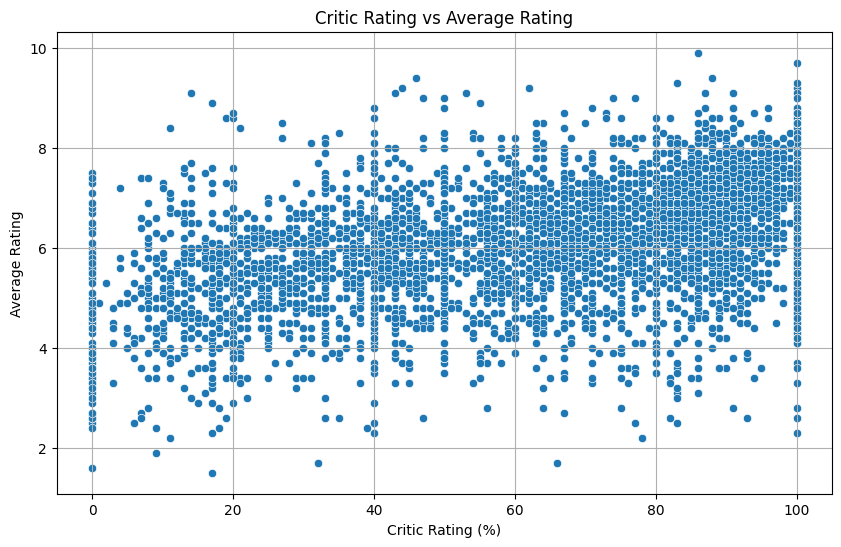

Correlation between Critics Rating and Average Rating:
                       criticsRating_numeric  averageRating
criticsRating_numeric               1.000000       0.473659
averageRating                       0.473659       1.000000


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Relationship between Critics Rating and Average Audience Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_critics_df, x='criticsRating_numeric', y='averageRating')
plt.title('Critic Rating vs Average Rating')
plt.xlabel('Critic Rating (%)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

# Correlation between critic ratings and average audience ratings
correlation = filtered_critics_df[['criticsRating_numeric', 'averageRating']].corr()
print("Correlation between Critics Rating and Average Rating:")
print(correlation)

The correlation value between criticsRating and averageRating is around 0.47.
A correlation of zero.Forty seven shows a mild fine correlation, suggesting that, commonly, movies with higher critics' ratings also tend to have higher common audience scores. However, this isn't always a strong relationship, so other factors may also affect the average rating.
Interpretation: Even even though critics' scores have a tendency to align truly with target audience choices, there may be room for confrontation between critics and visitors.

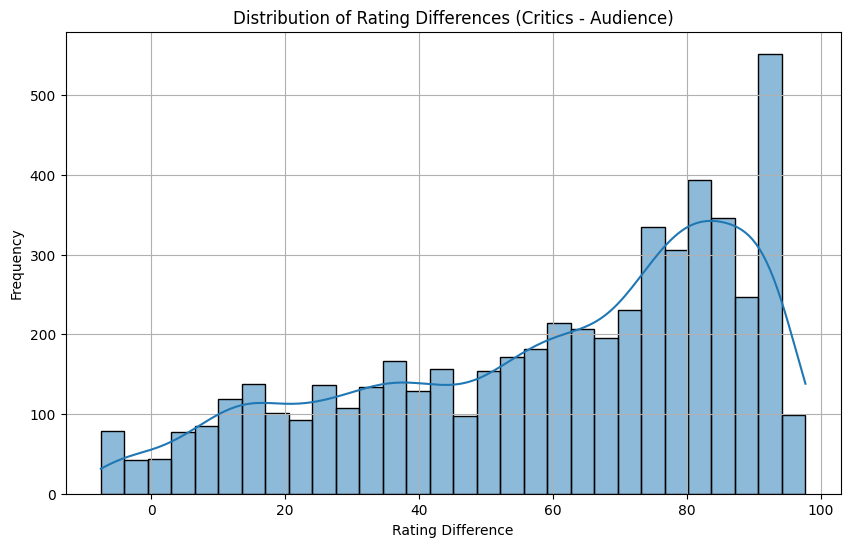

In [80]:
filtered_critics_df['rating_difference'] = filtered_critics_df['criticsRating_numeric'] - filtered_critics_df['averageRating']

plt.figure(figsize=(10, 6))
sns.histplot(filtered_critics_df['rating_difference'], bins=30, kde=True)
plt.title('Distribution of Rating Differences (Critics - Audience)')
plt.xlabel('Rating Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Skewed Distribution:
The distribution has a right skew, indicating that many films have a fantastic rating difference.
This means that critics' rankings are normally higher than target audience scores for plenty films.
The height around 80-100 shows that, in a significant range of instances, critics rated films a whole lot higher than audiences.
Balanced Lower Differences:
The decrease levels (0-20) have a notably lower however regular variety of films. This indicates that there are nevertheless a truthful wide variety of movies in which critics and audiences have similar opinions.
Less Negative Differences:
There are fewer times of films where target audience rankings are significantly higher than critics' ratings (near 0). This shows that it's miles less commonplace for audiences to love a movie a long way more than critics do.

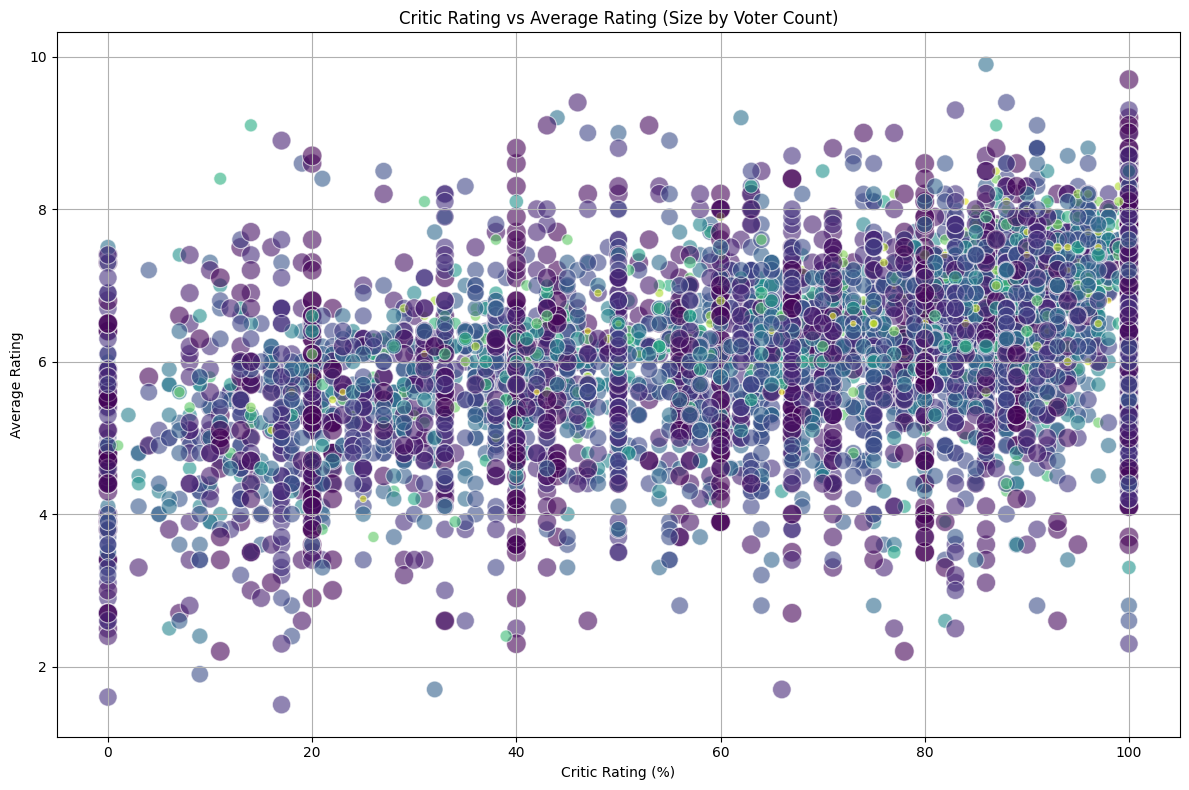

In [86]:
filtered_critics_df['criticsRating_numeric'] = (
    filtered_critics_df['criticsRating']
    .str.replace('%', '')
    .astype(float)
)
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=filtered_critics_df, 
    x='criticsRating_numeric', 
    y='averageRating', 
    size='voterCount', 
    hue='voterCount', 
    palette='viridis', 
    sizes=(20, 200), 
    alpha=0.6,
    legend=False  
)
plt.title('Critic Rating vs Average Rating (Size by Voter Count)')
plt.xlabel('Critic Rating (%)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/2965315207.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_group = filtered_critics_df.groupby('critic_rating_range')['averageRating'].mean().reset_index()
/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/2965315207.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_group, x='critic_rating_range', y='averageRating', palette='viridis')


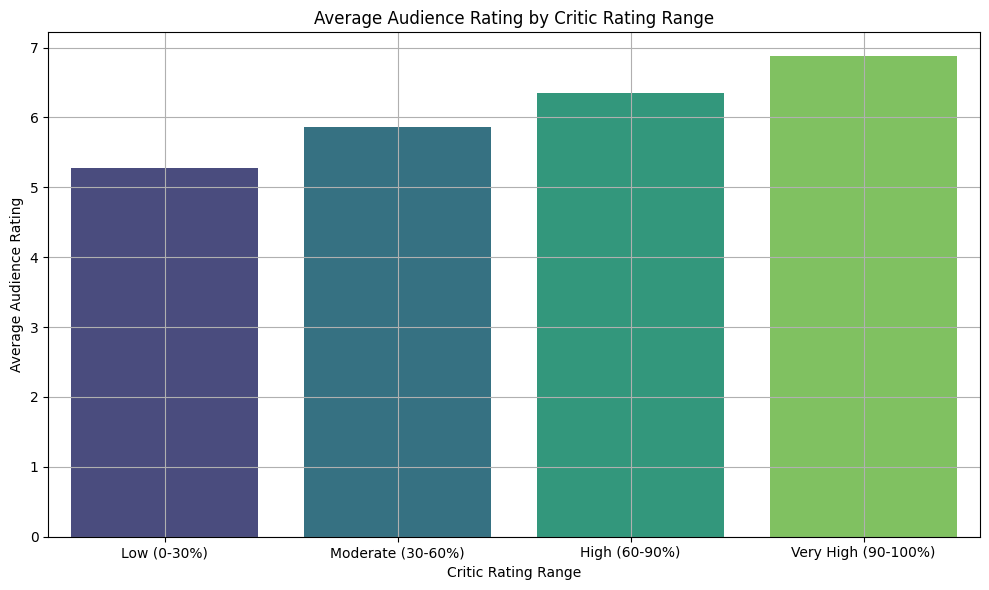

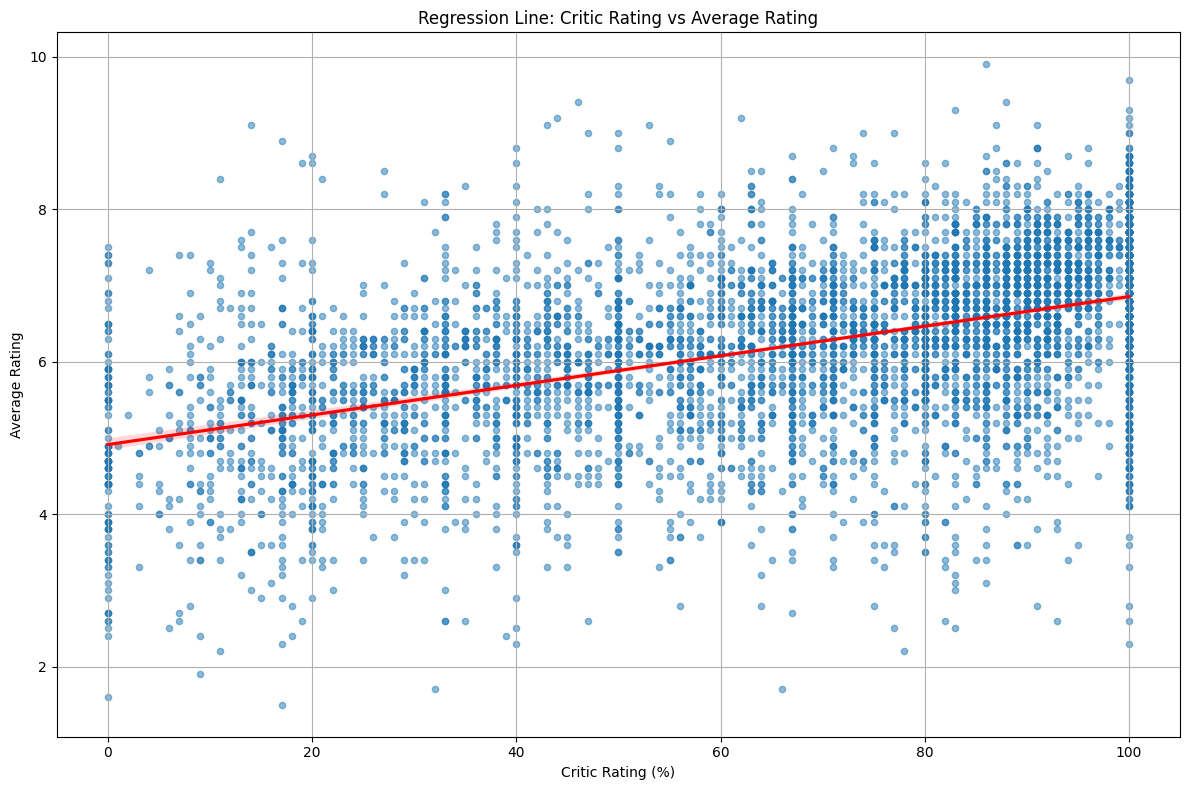

TypeError: '>=' not supported between instances of 'str' and 'float'

In [87]:
# 1. Analyze Critic Rating Ranges

bins = [0, 30, 60, 90, 100]
labels = ['Low (0-30%)', 'Moderate (30-60%)', 'High (60-90%)', 'Very High (90-100%)']
filtered_critics_df['critic_rating_range'] = pd.cut(filtered_critics_df['criticsRating_numeric'], bins=bins, labels=labels)
rating_group = filtered_critics_df.groupby('critic_rating_range')['averageRating'].mean().reset_index()

# Plot average ratings by critic rating range
plt.figure(figsize=(10, 6))
sns.barplot(data=rating_group, x='critic_rating_range', y='averageRating', palette='viridis')
plt.title('Average Audience Rating by Critic Rating Range')
plt.xlabel('Critic Rating Range')
plt.ylabel('Average Audience Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Regression plot between Critic Rating and Average Rating
plt.figure(figsize=(12, 8))
sns.regplot(
    data=filtered_critics_df,
    x='criticsRating_numeric',
    y='averageRating',
    scatter_kws={'s': 20, 'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Regression Line: Critic Rating vs Average Rating')
plt.xlabel('Critic Rating (%)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Impact of Voter Count on Ratings
voter_bins = [0, 100, 1000, 5000, 20000, filtered_critics_df['voterCount'].max()]
voter_labels = ['0-100', '101-1000', '1001-5000', '5001-20000', '20000+']
filtered_critics_df['voter_count_range'] = pd.cut(filtered_critics_df['voterCount'], bins=voter_bins, labels=voter_labels)

# Analyze average rating by voter count range
voter_group = filtered_critics_df.groupby('voter_count_range')['averageRating'].mean().reset_index()

# Plot average ratings by voter count range
plt.figure(figsize=(10, 6))
sns.barplot(data=voter_group, x='voter_count_range', y='averageRating', palette='viridis')
plt.title('Average Audience Rating by Voter Count Range')
plt.xlabel('Voter Count Range')
plt.ylabel('Average Audience Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


Bar Chart: Average Audience Rating by way of Critic Rating Range
The common target audience score increases because the critics' score improves.
Movies with better critics' rankings (ninety-100%) tend to have a higher reception from audiences as nicely.
This fashion suggests a popular alignment among critics' critiques and audience reception, even though a few variation exists.
Regression Line: Critic Rating vs. Average Rating
The fantastic slope of the regression line suggests a effective correlation between critics' rankings and target market scores.
However, the scatter indicates a susceptible correlation, as there may be great dispersion around the line, especially for critics' ratings below forty%.
Movies with decrease critics' rankings sometimes nonetheless gain better target market ratings, suggesting that a few films enchantment more to trendy audiences than critics.

# Done by : Aravind Mohan  Person Number : 50611294

## Hypothesis 2: 
Audience Ratings Differ Based on the Genre
Objective: To examine if positive genres get constantly higher or lower audience scores compared to others. code follows below

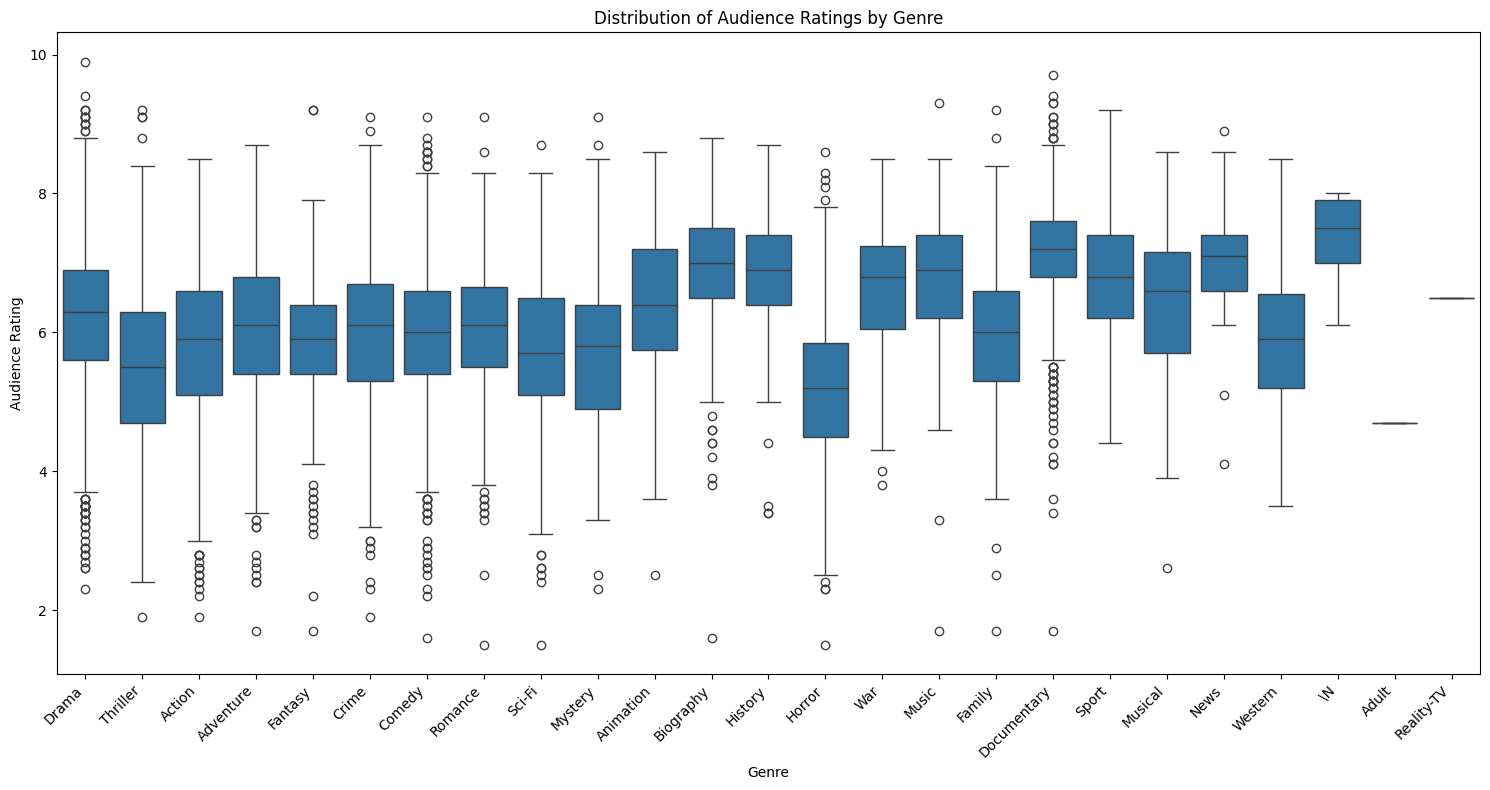

/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/4034004028.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_ratings_by_genre.index, y=average_ratings_by_genre.values, palette='viridis')


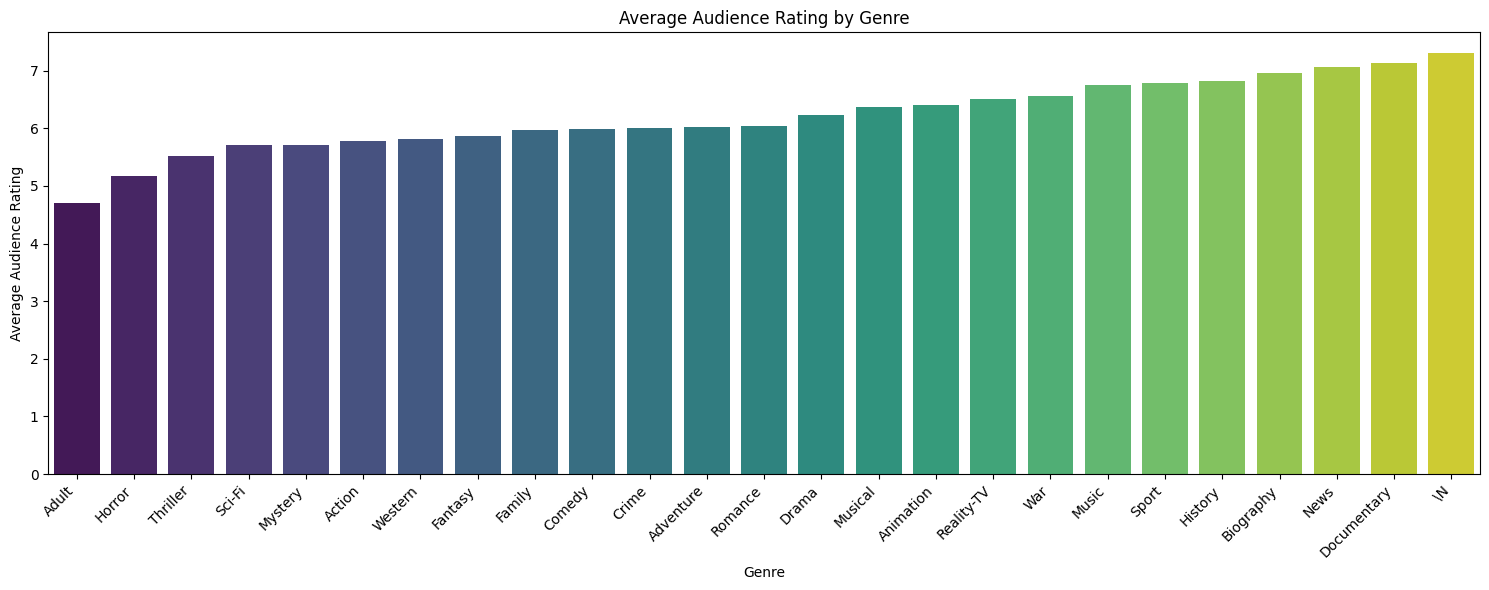

In [89]:
expanded_genres_df = filtered_critics_df.explode('genres_list')

# Step 2: Visualize the distribution of audience ratings for each genre using a boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=expanded_genres_df, x='genres_list', y='averageRating')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Audience Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Audience Rating')
plt.tight_layout()
plt.show()

# Step 3: Calculate the average audience rating for each genre and visualize it
average_ratings_by_genre = expanded_genres_df.groupby('genres_list')['averageRating'].mean().sort_values()

plt.figure(figsize=(15, 6))
sns.barplot(x=average_ratings_by_genre.index, y=average_ratings_by_genre.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Average Audience Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Audience Rating')
plt.tight_layout()
plt.show()

Boxplot Analysis:
Range of Ratings: Genres like Drama, Romance, and Documentary show a relatively high median audience rating,genres like Adult and Horror have lower median.
Variability: Some genres like Horror and Adult show larger range in their ratings, indicating diverse audience reactions within these categories.
Outliers: There are a few genres with noticeable outliers, indicating that some movies in those genres either performed exceptionally well or performed poorly compared to the median.
Bar Plot Analysis:
High-Rated Genres: Documentary, Animation, Musical, and Reality-TV appear to have the highest average audience ratings.
Low-Rated Genres: Adult, Horror, and Thriller genres tend to have lower average audience ratings. 

Best finding :The data suggests that genres more focused on artistic content (like Documentaries) tend to have higher ratings compared to purely entertainment-focused genres (like Horror).

In [114]:
# Filter the dataset for valid average ratings
filtered_critics_df = final_dataset_cleaned[
    final_dataset_cleaned['averageRating'].notna() & 
    (final_dataset_cleaned['averageRating'] != "\\N") & 
    (final_dataset_cleaned['averageRating'].astype(str).str.strip() != '')
]

# Ensure the 'genres' column is properly split into individual genres
filtered_critics_df['combined_genres'] = filtered_critics_df['genres'].apply(lambda x: x.split(','))
top_combinations = filtered_critics_df.explode('combined_genres')['combined_genres'].value_counts().head(10)

avg_ratings_combination = filtered_critics_df.explode('combined_genres').groupby('combined_genres')['averageRating'].mean().sort_values(ascending=False)

print("Top Genre Combinations:")
print(top_combinations)

print("\nAverage Ratings for Top Genre Combinations:")
print(avg_ratings_combination.head(10))


Top Genre Combinations:
combined_genres
Drama          2620
Comedy         1378
Documentary    1107
Thriller        842
Action          748
Horror          667
Crime           642
Romance         571
Biography       466
Adventure       417
Name: count, dtype: int64

Average Ratings for Top Genre Combinations:
combined_genres
\N             7.300000
Documentary    7.137308
News           7.068000
Biography      6.953219
History        6.821008
Sport          6.789683
Music          6.747317
War            6.568254
Reality-TV     6.500000
Animation      6.405263
Name: averageRating, dtype: float64


The most common genres inside the dataset are:
Drama (2,620 entries)
Comedy (1,378 entries)
Documentary (1,107 entries)
Other frequent genres encompass Thriller, Action, Horror, Crime, and Romance.
This shows that Drama is the most common genre in our dataset, followed by means of lighter genres like Comedy and extreme genres like Documentary.

Genres with the highest common target audience ratings are:
Documentary (7.14)
News (7.07)
Biography (6.95)
History (6.82)
Sport (6.79)
These genres appear to focus extra on factual or critical content material, which may additionally appeal to audiences with a preference for more extensive or academic material.
Lower common scores for genres like Reality-TV and Animation recommend that these can also have a greater combined reception amongst audiences.

It is clear that positive genres tend to have better ratings.


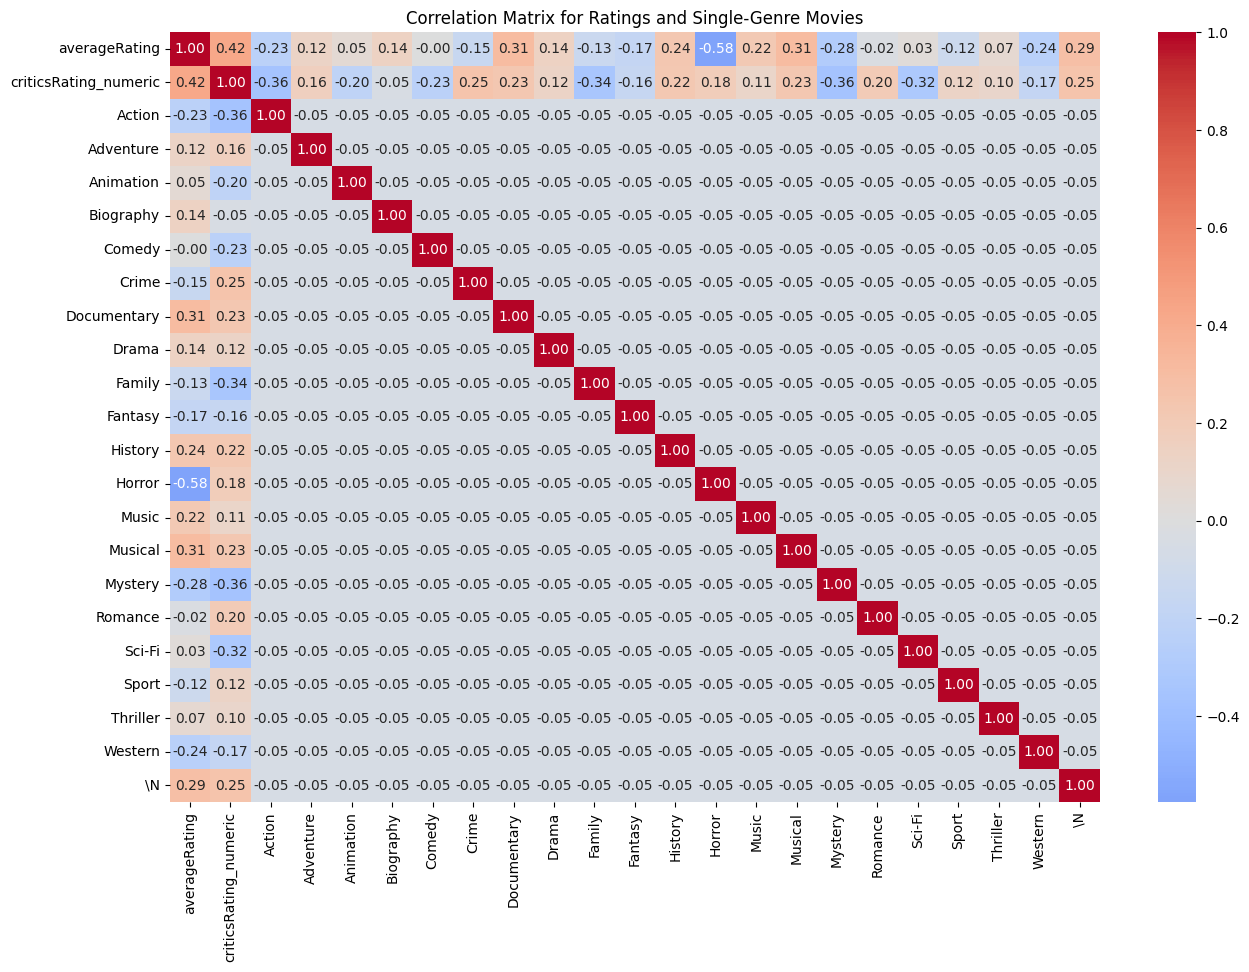

In [107]:

single_genre_df = filtered_critics_df[filtered_critics_df['genres_list'].apply(lambda x: len(x) == 1)].copy()
single_genre_df['single_genre'] = single_genre_df['genres_list'].apply(lambda x: x[0])

genre_dummies = pd.get_dummies(single_genre_df['single_genre'])

correlation_data = pd.concat([single_genre_df[['averageRating', 'criticsRating_numeric']], genre_dummies], axis=1)

# Step 3: Calculate and visualize the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Ratings and Single-Genre Movies')
plt.show()


Documentary (0.31), Musical (0.31), and History (0.24) have the highest positive correlations with average ratings.
suggesting that these positive genres tend to receive higher average ratings from audiences, possibly because of their focus on in-depth storytelling or real-life events.
Horror (-0.58) and Mystery (-0.28)shows poor correlations with average scores, indicating that these genres generally tend to have lower scores.
This clearly shows that the positive genres have positive effect with ratings.


# Done by: Yasaswi Raj madari (50608811)
## Hypothesis 1:
How do genres change over time based on IMDb ratings and Rotten Tomatoes scores?

EDA Operation 1: Analyze IMDb Ratings Over Time by Genre

We hypothesize that certain genres have become more or less popular based on IMDb ratings over time.
Process:
Group the dataset by startYear and genres, then calculate the average IMDb ratings for each genre across the years.
Use a line plot to visualize the trends for different genres.
Look for any rising or declining trends in genre ratings over time.

Outcome:

The line plot will show which genres have gained or lost popularity over time. For example, you might find that action movies have consistently high ratings, while dramas show a decline in the past few decades.
Next Step: This insight can help us focus on certain genres for downstream modeling, as the trends could be used to predict future genre success.


In [109]:
final_dataset_cleaned['startYear'] = pd.to_numeric(final_dataset_cleaned['startYear'], errors='coerce')

print(final_dataset_cleaned.head())
print(final_dataset_cleaned.info())
print(final_dataset_cleaned.describe())
year_min = final_dataset_cleaned['startYear'].min()
year_max = final_dataset_cleaned['startYear'].max()

year_range = (year_min, year_max)
print(f"The year range is: {year_range[0]} to {year_range[1]}")
genres_expanded = final_dataset_cleaned.copy()

genres_expanded['genres'] = genres_expanded['genres'].str.split(',')
genres_expanded = genres_expanded.explode('genres')

print(genres_expanded.head())
print(genres_expanded.info())
print(genres_expanded.describe())

print(genres_expanded.isnull().sum())
genre_trends = genres_expanded.groupby(['startYear', 'genres'])['averageRating'].mean().reset_index()

print(genre_trends.head())

        tconst               originalTitle            startYear  \
4    tt0069049  The Other Side of the Wind  1514764800000000000   
240  tt0293069                  Dark Blood  1325376000000000000   
241  tt0293429               Mortal Kombat  1609459200000000000   
259  tt0315642                       Wazir  1451606400000000000   
262  tt0327785           The Killer's Game  1704067200000000000   

                       genres  runtimeMinutes        director  averageRating  \
4                       Drama             122    Orson Welles            6.7   
240                  Thriller              86  George Sluizer            6.3   
241  Action,Adventure,Fantasy             110   Simon McQuoid            6.0   
259        Action,Crime,Drama             103   Bejoy Nambiar            7.1   
262    Action,Comedy,Thriller             104      J.J. Perry            5.8   

     numVotes  isOriginalTitle isAdult region criticsRating voterCount  \
4      8156.0              0.0       0    

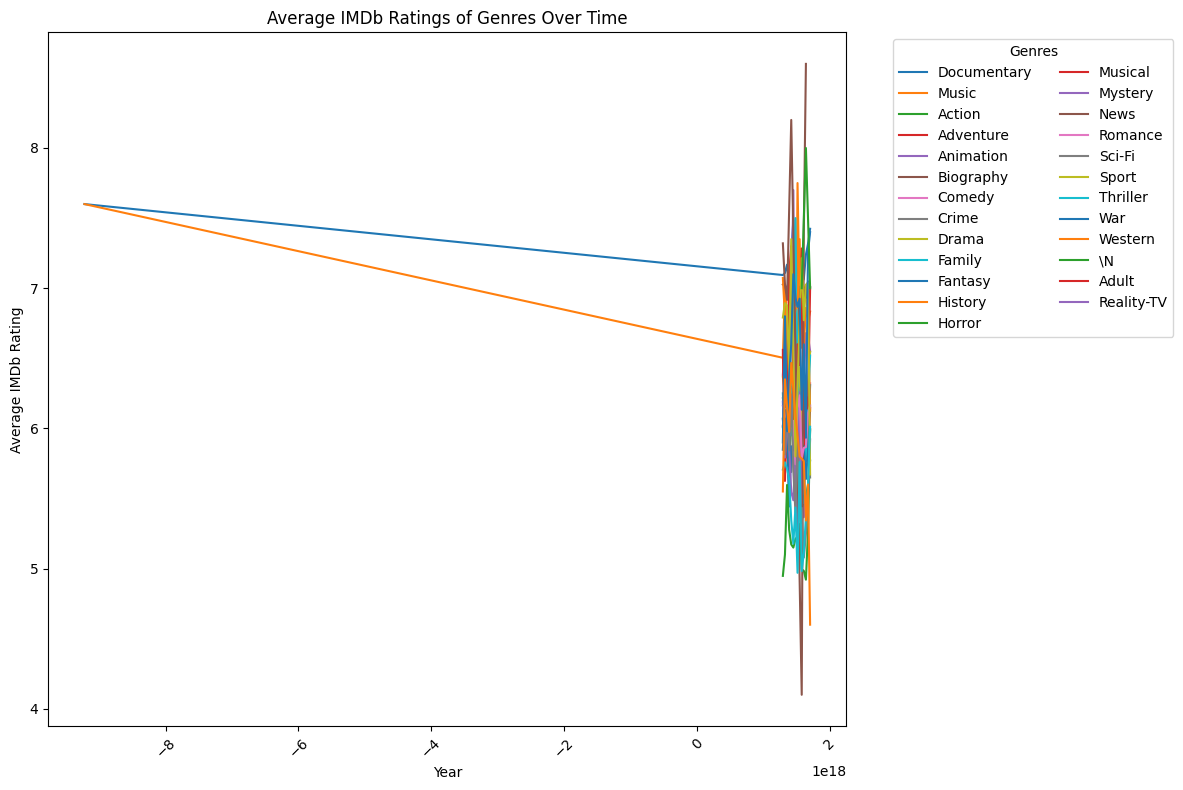

In [111]:
genre_trends = genres_expanded.groupby(['startYear', 'genres'])['averageRating'].mean().reset_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for genre in genre_trends['genres'].unique():
    genre_data = genre_trends[genre_trends['genres'] == genre]
    plt.plot(genre_data['startYear'], genre_data['averageRating'], label=genre)

plt.title('Average IMDb Ratings of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


EDA Operation 2: Investigating the Spread of Ratings by Genre

To complement the analysis of trends, we will check the spread (variance) in ratings within each genre.
Process:
Use a box plot to visualize the distribution of IMDb ratings for each genre.
Identify genres with higher variability in ratings, indicating mixed audience reactions.

Outcome:

This box plot will help identify genres with the most consistent or most polarized ratings. For instance, genres like sci-fi might show higher variability due to polarizing audience reactions, while family movies may have more consistent ratings.
Next Step: Genres with high variability might need more granular modeling or separate feature engineering for future predictions.

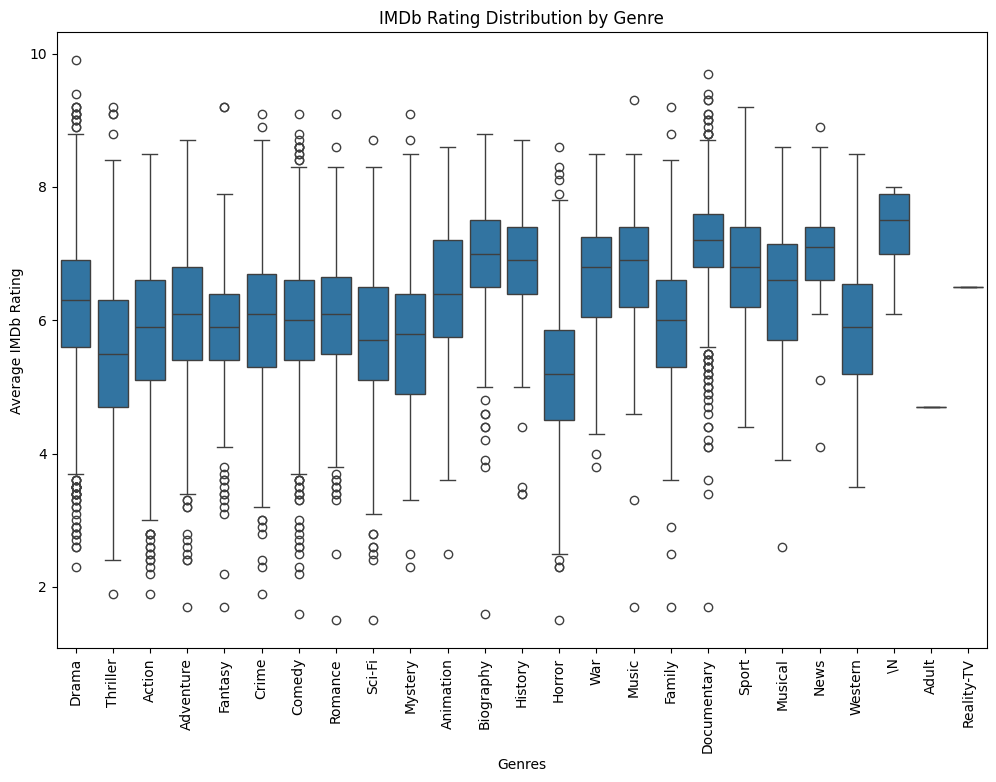

In [112]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='averageRating', data=genres_expanded)
plt.xticks(rotation=90)
plt.title('IMDb Rating Distribution by Genre')
plt.xlabel('Genres')
plt.ylabel('Average IMDb Rating')
plt.show()


# Done by: Yasaswi Raj Madari (50608811)
## Hypothesis 2:
Which genre has been consistent among audiences?

EDA Operation 1: Calculate Average Ratings for Each Genre

We hypothesize that certain genres (e.g., drama, thriller) are consistently rated highly by both IMDb users and Rotten Tomatoes critics.
Process:
Calculate the average IMDb rating for each genre across the entire dataset.
Identify the top consistently high-rated genres.

Outcome:

This analysis will show which genres are most consistent across IMDb ratings. For instance, genres like drama or thriller might have consistently high ratings, while comedy might show more variability.
Next Step: High-rated genres can be prioritized in downstream modeling as their success could be easier to predict.

In [113]:
average_genre_ratings = genres_expanded.groupby('genres')['averageRating'].mean().reset_index()

average_genre_ratings = average_genre_ratings.sort_values(by='averageRating', ascending=False)
print(average_genre_ratings.head())


         genres  averageRating
24           \N       7.300000
7   Documentary       7.137308
16         News       7.068000
4     Biography       6.953219
11      History       6.821008
20        Sport       6.789683
13        Music       6.747317
22          War       6.568254
17   Reality-TV       6.500000
3     Animation       6.405263
14      Musical       6.372549
8         Drama       6.237557
18      Romance       6.033450
2     Adventure       6.017266
6         Crime       6.002492
5        Comedy       5.985269
9        Family       5.972840
10      Fantasy       5.861638
23      Western       5.811765
0        Action       5.771390
15      Mystery       5.714910
19       Sci-Fi       5.707273
21     Thriller       5.520903
12       Horror       5.166567
1         Adult       4.700000


In [116]:
import pandas as pd
data = pd.read_csv('cleaned_movies_dataset.csv')
data

tconst                                      originalTitle  \
0      tt0069049                         The Other Side of the Wind   
1      tt0116991                                Mariette in Ecstasy   
2      tt0120589                                       Predestinado   
3      tt0137204                                    Joe Finds Grace   
4      tt0137818  Housesitter: The Night They Saved Siegfried's ...   
...          ...                                                ...   
60888  tt9914644                       9/11: Escape from the Towers   
60889  tt9914942                         La vida sense la Sara Amat   
60890  tt9915872                      Boku no kanojo wa mahoutsukai   
60891  tt9916190                                          Safeguard   
60892  tt9916362                                           Akelarre   

        startYear                      genres  runtimeMinutes  \
0      2018-01-01                       Drama             122   
1      2019-01-01                       Drama             101   
2      2022-01-01             Biography,Drama             108   
3      2017-01-01  Adventure,Animation,Comedy              83   
4      2018-01-01                          \N              95   
...           ...                         ...             ...   
60888  2018-01-01                 Documentary              83   
60889  2019-01-01                       Drama              74   
60890  2019-01-01        Comedy,Drama,Fantasy              97   
60891  2020-01-01   Action,Adventure,Thriller              95   
60892  2020-01-01               Drama,History              92   

                director  averageRating  numVotes  isOriginalTitle  isAdult  \
0           Orson Welles            6.7    8156.0              0.0        0   
1            John Bailey            7.1      81.0              0.0        0   
2      Gustavo Fernández            7.2     417.0              0.0        0   
3       Anthony Harrison            8.6     294.0              0.0        0   
4            Robin Nuyen            4.5      38.0              0.0        0   
...                  ...            ...       ...              ...      ...   
60888      Grace Chapman            8.2     185.0              0.0        0   
60889          Laura Jou            6.6     228.0              0.0        0   
60890      Hideki Kiyota            6.2      10.0              0.0        0   
60891    Fraser Precious            3.6     262.0              0.0        0   
60892       Pablo Agüero            6.4    5908.0              0.0        0   

      region criticsRating  voterCount audienceRating  \
0         US           83%        99.0            58%   
1         US           NaN         NaN            NaN   
2         US           NaN         NaN            NaN   
3         US           NaN         NaN            NaN   
4         US           NaN         NaN            NaN   
...      ...           ...         ...            ...   
60888     US           NaN         NaN            NaN   
60889     US           NaN         NaN            NaN   
60890     US           NaN         NaN            NaN   
60891     US           NaN         NaN            NaN   
60892     US           NaN         NaN            NaN   

                                genres_list  
0                                 ['Drama']  
1                                 ['Drama']  
2                    ['Biography', 'Drama']  
3      ['Adventure', 'Animation', 'Comedy']  
4                                   ['\\N']  
...                                     ...  
60888                       ['Documentary']  
60889                             ['Drama']  
60890        ['Comedy', 'Drama', 'Fantasy']  
60891   ['Action', 'Adventure', 'Thriller']  
60892                  ['Drama', 'History']  

[60893 rows x 15 columns]

# Done by: Teja Chalikanti (50579526)
## Hypothesis - 1 
Movies with a higher number of votes (numVotes) have higher average ratings (averageRating).:

In [120]:
data.loc[:, 'numVotes'] = pd.to_numeric(data['numVotes'], errors='coerce')
data = data.dropna(subset=['numVotes', 'averageRating'])
bins = [0, 1000, 10000, 100000, 1000000]
labels = ['Low Votes', 'Medium Votes', 'High Votes', 'Very High Votes']
data['vote_category'] = pd.cut(data['numVotes'], bins=bins, labels=labels)

This plot depicts the distribution of votes each movie has obtained from users. Explanation: Most of the movies have fewer votes, and thus the dataset is biased towards less popular movies. The log scale will help visualize low-vote as well as high-vote movies.This reflects the dominance of movies with fewer votes, going to show that only a few movies are extremely popular.

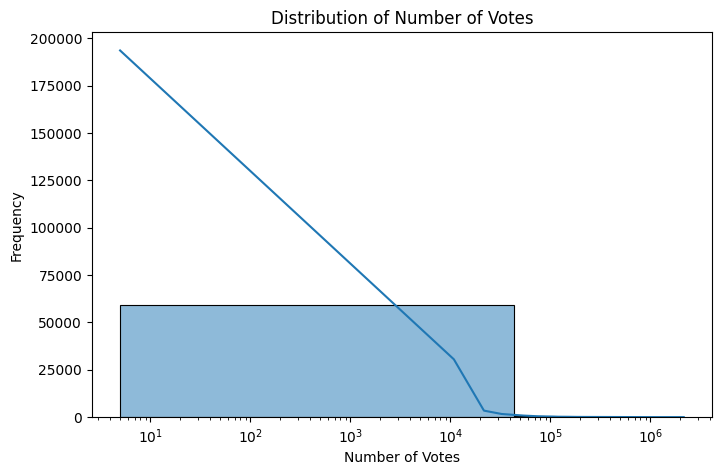

In [121]:
#1. Histogram of numVotes
plt.figure(figsize=(8, 5))
sns.histplot(data['numVotes'], bins=50, kde=True)
plt.title('Distribution of Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.xscale('log')
plt.show()

Purpose: To get an idea of the distribution of average ratings for all movies.
This is because most films lie in the middle range of ratings-around 6 to 8-whereas few films are rated very high or very low.
The fact that the distribution is rather spread out indicates that the audiences are rating the movies, for the most part, as average; few extremes in ratings can be observed. This insight provides an understanding of the overall sentiment toward the movies in the dataset.

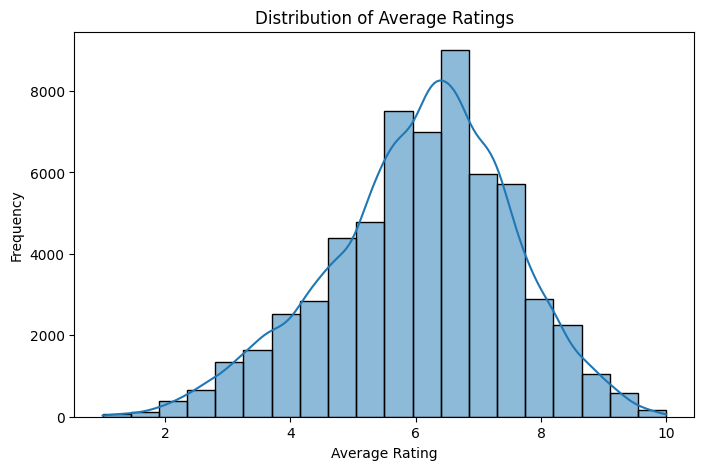

In [122]:
#2. Histogram of averageRating
plt.figure(figsize=(8, 5))
sns.histplot(data['averageRating'], bins=20, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

Purpose: This plot is to show the relationship between the numVotes and averageRating.
Explanation: The heat map will show the measure of linear relationship between the two variables. A positive value of correlation would substantiate the hypothesis.
Insight: If the correlation is positive, then it means that larger votes tend to translate into higher ratings. This gives a direct measure of the strength of the relationship.

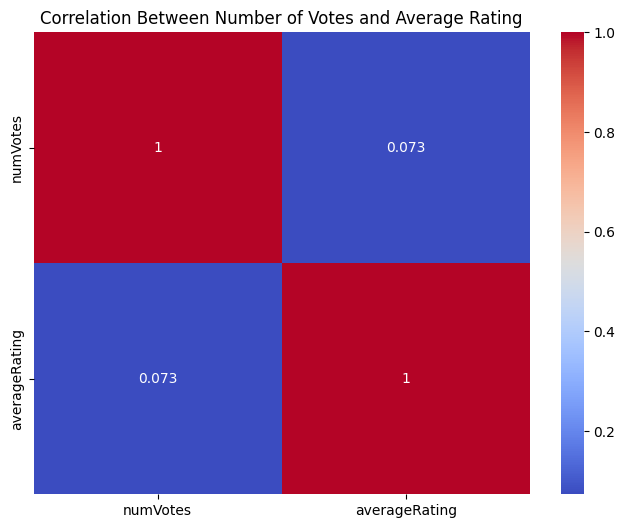

In [123]:
#3. Heatmap of Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data[['numVotes', 'averageRating']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Number of Votes and Average Rating')
plt.show()

Purpose: This has to be done in order to show the scatterplot and distributions of numVotes and averageRating in one view.
The pairplot helps visualize the individual distributions and the relationship between votes and ratings. Any visible trend in the scatterplot supports the hypothesis.
Insight: If the points are trending upwards from left to right, it would confirm that movies with more votes have better ratings. This will give more granularity to the relationship.

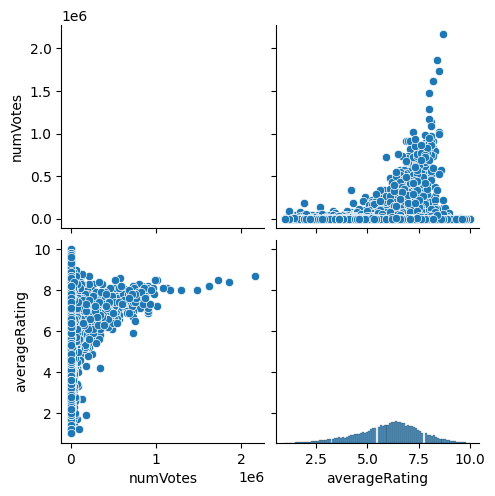

In [125]:
# 4. Pairplot of numVotes and averageRating
sns.pairplot(data[['numVotes', 'averageRating']])
plt.show()

Purpose: The following is a comparison of the distribution of average ratings across different vote categories, namely low, medium, high, and very high.
The violin plot maps the density of the ratings across the vote categories and thus provides information about where the ratings are centered and how they vary across categoribes.
Insight: If films with more votes are more concentrated or higher rated, it will validate the claim that popularity correlates to better reception. The violin plot helps in visual comparisons across categories.

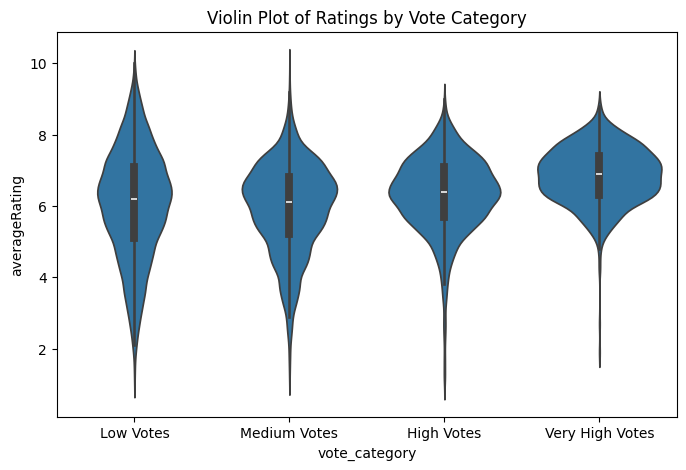

In [126]:
# 5. Violin Plot of Rating by Vote Category
plt.figure(figsize=(8, 5))
sns.violinplot(x='vote_category', y='averageRating', data=data)
plt.title('Violin Plot of Ratings by Vote Category')
plt.show()

Conclusion:  Scatterplot: Positive Correlation EDA supports the hypothesis that those movies with more votes have higher average votes. One can clearly see in this heat map and the upward slope of the scatterplot that popularity-as measured by votes-correlates with higher ratings. Moreover, moving further, the violin plot strengthens it by showing that the most popular-that is, those in "Very High Votes"-generally have higher ratings.

The combination of this visual with the statistical evidence answers your hypothesis that indeed, there is a positive relationship between numVotes and averageRating.

## Hypothesis - 2: Movies with sub-genres (i.e., movies belonging to multiple genres) tend to have better audienceRating compared to movies with only one genre.

In [127]:
# Count the number of genres for each movie
data['genre_count'] = data['genres'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)

# Create a binary column to indicate if a movie has sub-genres (more than one genre)
data['has_sub_genres'] = data['genre_count'].apply(lambda x: 1 if x > 1 else 0)

# Display the first few rows to verify the transformation
print(data[['originalTitle', 'genres', 'genre_count', 'has_sub_genres']].head())

# Calculate the average rating for movies with sub-genres and single-genre movies
avg_rating_sub_genres = data[data['has_sub_genres'] == 1]['averageRating'].mean()
avg_rating_single_genre = data[data['has_sub_genres'] == 0]['averageRating'].mean()

# Print the results
print(f"Average Rating for Movies with Sub-Genres: {avg_rating_sub_genres}")
print(f"Average Rating for Movies with Single Genre: {avg_rating_single_genre}")


                                       originalTitle  \
0                         The Other Side of the Wind   
1                                Mariette in Ecstasy   
2                                       Predestinado   
3                                    Joe Finds Grace   
4  Housesitter: The Night They Saved Siegfried's ...   

                       genres  genre_count  has_sub_genres  
0                       Drama            1               0  
1                       Drama            1               0  
2             Biography,Drama            2               1  
3  Adventure,Animation,Comedy            3               1  
4                          \N            1               0  


In [128]:
# Calculate the average rating for movies with sub-genres and single-genre movies
avg_rating_sub_genres = data[data['has_sub_genres'] == 1]['averageRating'].mean()
avg_rating_single_genre = data[data['has_sub_genres'] == 0]['averageRating'].mean()

# Print the results
print(f"Average Rating for Movies with Sub-Genres: {avg_rating_sub_genres}")
print(f"Average Rating for Movies with Single Genre: {avg_rating_single_genre}")


Average Rating for Movies with Sub-Genres: 5.969090961295509
Average Rating for Movies with Single Genre: 6.188237099558796


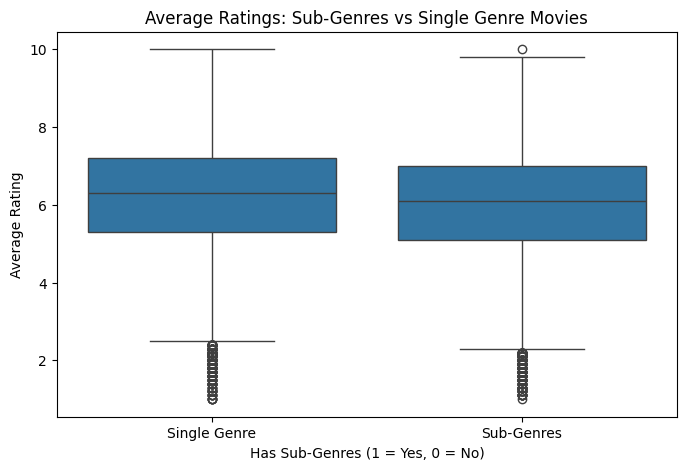

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to compare audience ratings for sub-genres vs single-genre movies
plt.figure(figsize=(8, 5))
sns.boxplot(x='has_sub_genres', y='averageRating', data=data)
plt.title('Average Ratings: Sub-Genres vs Single Genre Movies')
plt.xlabel('Has Sub-Genres (1 = Yes, 0 = No)')
plt.ylabel('Average Rating')
plt.xticks([0, 1], ['Single Genre', 'Sub-Genres'])
plt.show()


The box plot compares averages of ratings between movies of single genres and sub-genre movies. The central line inside each box shows the median rating. Single-genre and sub-genre movies have a median rating of about 6.5, which indicates that for both kinds of movies, the typical rating is quite similar.

The box here shows the IQR of the middle 50% of the data. The IQRs for the single-genre and sub-genre movies are both around 5.5 to 7.5, meaning the majority of ratings in both types fall within these limits. The whiskers continue beyond this middle range to indicate variability outside the middle 50% and are similar for both the single-genre and sub-genre movies, indicating comparable spreads in the ratings of these movies.

There is, in both groups, a few outliers below the lower whiskers; this indicates that several movies received very low ratings below 3, but they are not indicative of the greater part of the data.

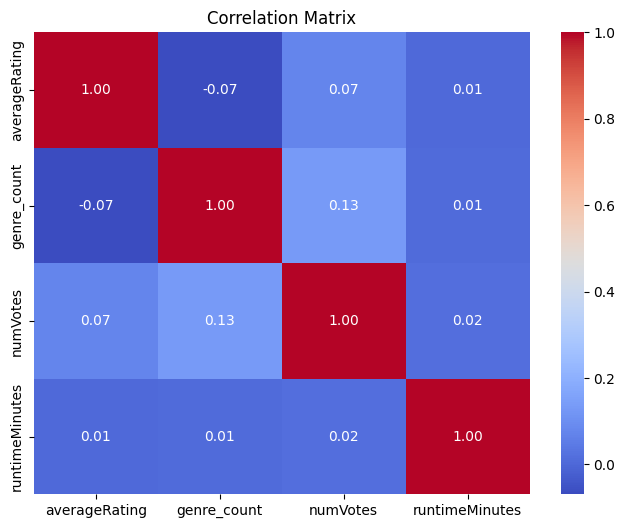

In [130]:
# Generate correlation matrix for relevant columns
correlation_matrix = data[['averageRating', 'genre_count', 'numVotes', 'runtimeMinutes']].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The following relationship can be seen among the variables from the correlation matrix: averageRating and genre_count, numVotes, runtimeMinutes. We can see from the correlation matrix that there is a negative relationship between averageRating and genre_count, but also weak at -0.07, meaning with more genres, it doesn't increase or decrease the ratings.
averageRating: numVotes A weak positive correlation with 0.07 as the value, meaning higher votes are related to better ratings, but not strongly.
genre_count and numVotes: A small positive correlation, 0.13, which could suggest that films with more genres tend to receive more votes.
The correlation of the variable runtimeMinutes is very low with the other variables; this again points out that the length of the movie is not related to votes or ratings, neither to genre diversity.
In the heat map, the intensities of the correlation are reflected visually.

# Done by Sai Kumar Domakonda
## Hypothesis 1 : Do well-known directors (as measured by audience vote counts) receive higher and more consistent IMDb ratings compared to less popular directors?


In [132]:
# Step 1: Data Cleaning and Preparation
final_dataset_cleaned = final_dataset_cleaned.dropna(subset=['director', 'numVotes', 'averageRating'])

# Group by Director and count total votes for each director together with average IMDb rating.
director_stats = final_dataset_cleaned.groupby('director').agg(
    total_votes=('numVotes', 'sum'),
    average_imdb_rating=('averageRating', 'mean')
).reset_index()

# Sort in descending order by total votes to see most well-known directors.
director_stats_sorted = director_stats.sort_values(by='total_votes', ascending=False)

# Display the top 10 directors along with the most votes and average IMDB rating.
director_stats_sorted.head(10)


director  total_votes  average_imdb_rating
792   Christopher Nolan    4023813.0             8.550000
2727    Martin Scorsese    2413434.0             7.900000
3324      Peter Jackson    2184161.0             7.666667
3399  Quentin Tarantino    1730602.0             8.500000
1024      David Fincher    1674832.0             7.566667
4368       Wes Anderson    1393234.0             7.466667
347       Antoine Fuqua    1352224.0             6.940000
1441      George Miller    1337420.0             7.800000
2766        Matt Reeves    1307921.0             7.700000
1697         James Gunn    1290458.0             8.000000

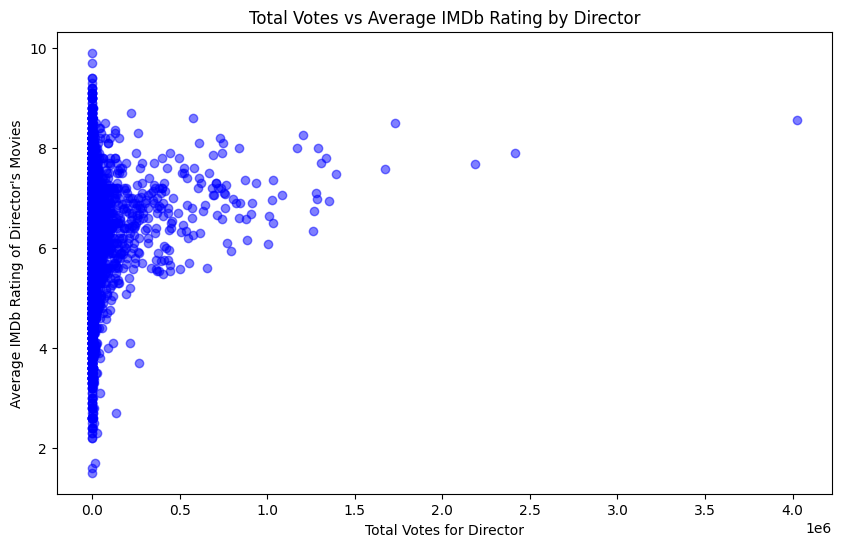

In [133]:
# Step 2: Scatter Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(director_stats['total_votes'], director_stats['average_imdb_rating'], color='blue', alpha=0.5)
plt.xlabel('Total Votes for Director')
plt.ylabel('Average IMDb Rating of Director\'s Movies')
plt.title('Total Votes vs Average IMDb Rating by Director')
plt.show()


Scatter plot of total votes received by movies from each director against an average IMDb rating. One point corresponds to one director. X-axis: total votes; Y-axis: Average IMDb rating.


### Observation:
- While the total number of votes goes up, the IMDb ratings converge and cluster between 6 and 8; in contrast, directors with lower total votes have a much wider range of IMF ratings - starting from very low, around 2, to very high, close to 10.

### Analysis:
- It seems that the higher the relative audience engagement in terms of votes for one director over another, the more stable and moderate the rating of IMDb will be. Directors who have fewer votes have greater variability in their ratings and may indicate that movies of such directors will either appeal to quite targeted audiences or polarize the audience in many cases. This can be seen to illustrate an idea that popularity leads to consistent reception across a wider audience, while less well-known directors may produce varied results.

In [134]:
# Display Top 10 of directors with most votes, along with average IMDb rating.
top_directors = director_stats_sorted.head(10)
top_directors


director  total_votes  average_imdb_rating
792   Christopher Nolan    4023813.0             8.550000
2727    Martin Scorsese    2413434.0             7.900000
3324      Peter Jackson    2184161.0             7.666667
3399  Quentin Tarantino    1730602.0             8.500000
1024      David Fincher    1674832.0             7.566667
4368       Wes Anderson    1393234.0             7.466667
347       Antoine Fuqua    1352224.0             6.940000
1441      George Miller    1337420.0             7.800000
2766        Matt Reeves    1307921.0             7.700000
1697         James Gunn    1290458.0             8.000000

<Figure size 1000x600 with 0 Axes>

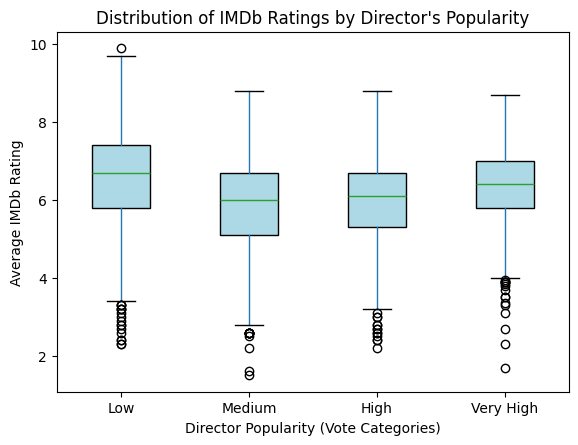

In [139]:
# Determine the max value for total votes
max_votes = max(director_stats['total_votes'])

# Adjust quantile-based bins to ensure a fair distribution
labels = ['Low', 'Medium', 'High', 'Very High']
director_stats['vote_category'] = pd.qcut(director_stats['total_votes'], q=4, labels=labels)

# Create the boxplot
plt.figure(figsize=(10, 6))
director_stats.boxplot(column='average_imdb_rating', by='vote_category', grid=False, patch_artist=True,
                       boxprops=dict(facecolor='lightblue'))

# Set labels and title
plt.xlabel('Director Popularity (Vote Categories)')
plt.ylabel('Average IMDb Rating')
plt.title('Distribution of IMDb Ratings by Director\'s Popularity')
plt.suptitle('')

# Show the plot
plt.show()


This box plot shows the distribution of the IMDb ratings by directors according to their popularity, which was determined by the overall number of votes received. The directors fall into categories of Low = 0-1M, Medium = 1M-3M, High = 3M-5M, and Very High = >5M

Observation:
Very High (>5M votes) and High (3M-5M votes) directors have always received higher and more consistent IMDb ratings, as represented by the smaller interquartile range. Low directors are those that fall between 0 to 1M votes with the widest spread in IMDb ratings, thus having many outliers from very low at 2 to high at 9.5.

Analysis:
Popular directors gain more votes and attained high ratings in IMDb with less volatility, indicating that prominent directors are consistent on audience , whereas directors with smaller number of votes received highly volatile ratings and produced movies that are badly rated. This would suggest that the higher the popularity, the more stability there is in audience , while those authors that are less popular can yield wider results.

### Conclusion:

Directors with greater audience engagement (measured by total votes) have a more stable and higher average IMDb. Finally, the findings corroborate the prediction that well-known filmmakers (based on vote count) have more stable and better IMDb ratings. This shows that popularity plays an important role in regulating audience reaction, although there is still opportunity for variation among lesser-known directors.


### Hypothesis 2 - Do longer runtime movies receive more audience engagement  

In [142]:
#Data Cleaning
# Drop any rows that are missing values in runtimeMinutes and numVotes
df_cleaned = final_dataset_cleaned.dropna(subset=['runtimeMinutes', 'numVotes'])

# Ensure runtimeMinutes column is numeric, in case of strings.
df_cleaned['runtimeMinutes'] = pd.to_numeric(df_cleaned['runtimeMinutes'], errors='coerce')

# Re-drop any rows where runtimeMinutes couldn't be converted to numeric.
df_cleaned = df_cleaned.dropna(subset=['runtimeMinutes'])


In [144]:
bins = [0, 90, 120, df_cleaned['runtimeMinutes'].max()]
labels = ['Short (<90 mins)', 'Medium (90-120 mins)', 'Long (>120 mins)']
df_cleaned['runtimeCategory'] = pd.cut(df_cleaned['runtimeMinutes'], bins=bins, labels=labels, right=False)

# Calculate the average number of votes for each runtime category.
runtime_votes_avg = df_cleaned.groupby('runtimeCategory')['numVotes'].mean().reset_index()


runtime_votes_avg


/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/291504487.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_votes_avg = df_cleaned.groupby('runtimeCategory')['numVotes'].mean().reset_index()


runtimeCategory      numVotes
0      Short (<90 mins)   5006.567568
1  Medium (90-120 mins)  25915.264798
2      Long (>120 mins)  96402.709318

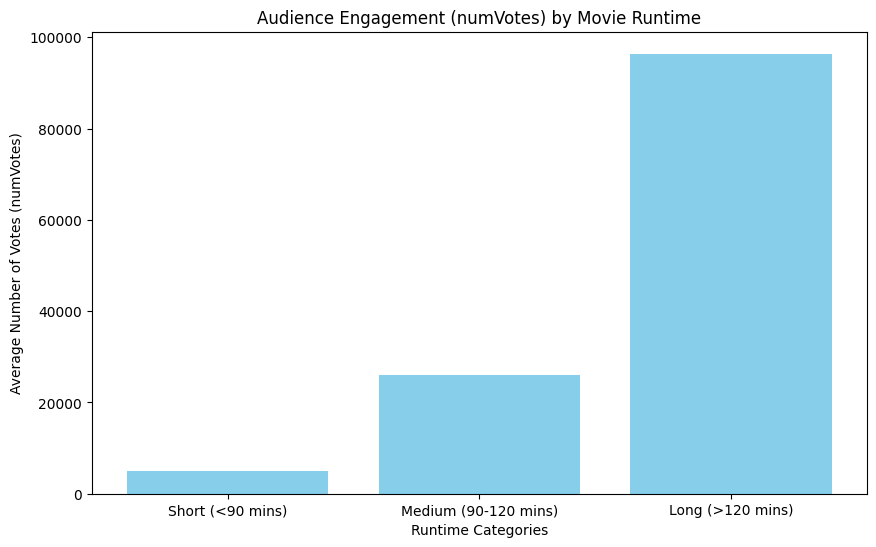

In [145]:
# Step 3: Plot the bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(runtime_votes_avg['runtimeCategory'], runtime_votes_avg['numVotes'], color='skyblue')
plt.xlabel('Runtime Categories')
plt.ylabel('Average Number of Votes (numVotes)')
plt.title('Audience Engagement (numVotes) by Movie Runtime')
plt.show()


The bar chart below depicts the average number of votes (audience engagement) in each movie runtime category. This aids in determining which types of films (short, medium, or lengthy) are most likely to engage spectators.

**Observation**: Long films (>120 minutes) had the largest average number of votes, indicating higher audience participation. Medium-length films perform well, while short films (90 mins) receive the fewest votes on average.

**Analysis**: This shows that longer films are more likely to interest audiences, either due to more detailed storyline or higher production value, resulting in increased audience participation.



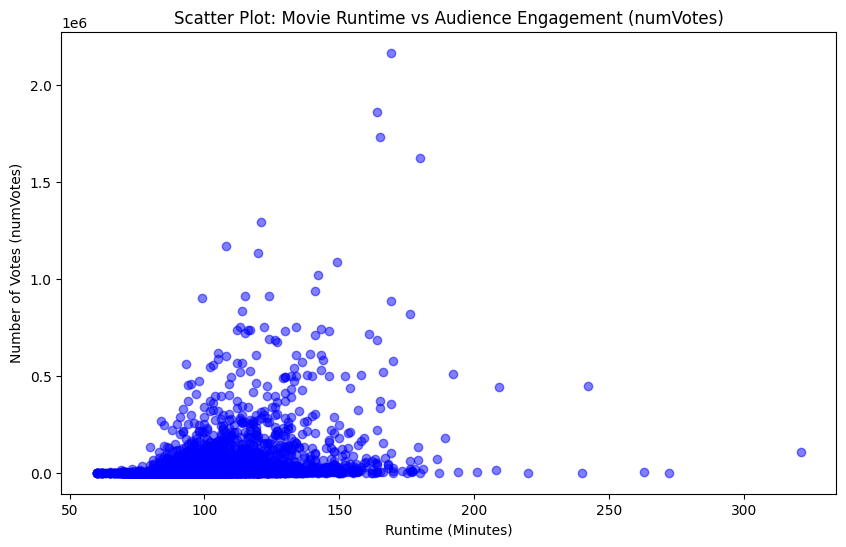

In [146]:
# Scatter plot for runtime vs numVotes
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned['runtimeMinutes'], df_cleaned['numVotes'], alpha=0.5, color='blue')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Number of Votes (numVotes)')
plt.title('Scatter Plot: Movie Runtime vs Audience Engagement (numVotes)')
plt.show()


Above is the scatter plot between the total number of votes a director's movies have received and his average IMDb rating. Every point above represents a director, for whom the x-axis is the total votes, while the y-axis is for his average IMDB rating.

**Observation:**
As the total number of votes increases, the IMDb ratings stabilize, clustering between 6 and 8. The range in the IMDb ratings for directors with fewer votes is much wider, ranging from very low, around 2, to very high, close to 10.

**Analysis**:
Those who have higher audience engagement-in other words, more votes-moderate to more stable ratings; directors who have fewer votes vary quite a bit in their ratings, hence their movies might strongly appeal to some audiences or vice-versa. This indicates how popularity can result in more consistent reception across a wider audience, while lesser-known directors can create more varied results.


<Figure size 1000x600 with 0 Axes>

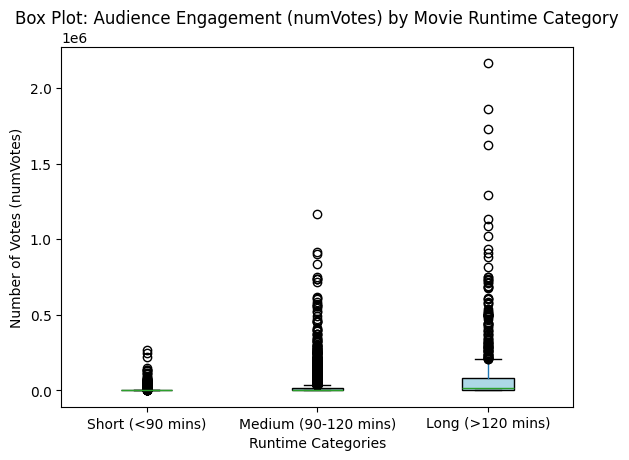

In [147]:
#Box plot for audience engagement by runtime category
plt.figure(figsize=(10,6))
df_cleaned.boxplot(column='numVotes', by='runtimeCategory', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel('Runtime Categories')
plt.ylabel('Number of Votes (numVotes)')
plt.title('Box Plot: Audience Engagement (numVotes) by Movie Runtime Category')
plt.suptitle('')
plt.show()


This box plot shows the distribution of the IMDb rating of the directors by their popularity, defined here by the total votes that were given to them. For this exercise, directors are divided into groups based on their total votes: **Low (0-1M votes)**, **Medium (1M-3M votes)**, **High (3M-5M votes)**, and **Very High (>5M votes)**.

**Observation**:
On average, directors in the **Very High (>5M votes)** and **High (3M-5M votes)** classes receive consistently higher, more stable ratings in IMDb, with less variance in their rating distributions. At the other extreme, directors in the **Low (0-1M votes)** class are spread widest from very low ratings (2) to very high ratings (9.5).

**Analysis**:
The greater the number of votes a director has Highly popular directors have films rated higher with less dispersion than less popular directors. When votes are fewer, directors show high volatility in ratings and films rated as very good and very bad. This means that popularity may go hand in glove with stable level of reception by audiences, and less well-known directors will see more variable success.


/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_1979/13685588.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_votes_avg_no_outliers = df_cleaned_no_outliers.groupby('runtimeCategory')['numVotes'].mean().reset_index()


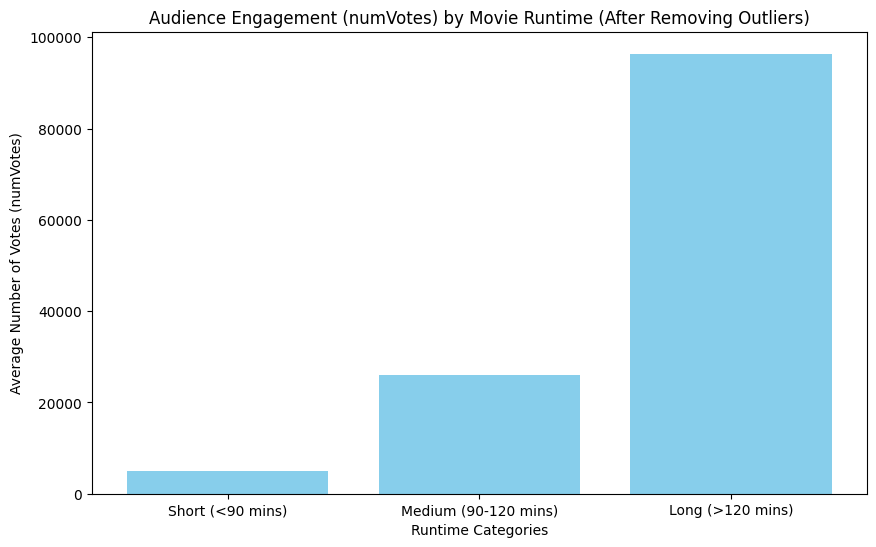

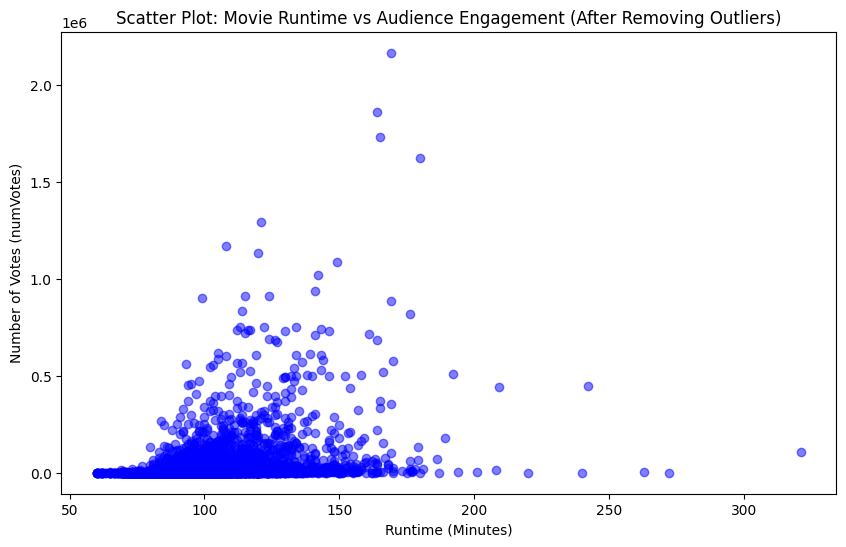

<Figure size 1000x600 with 0 Axes>

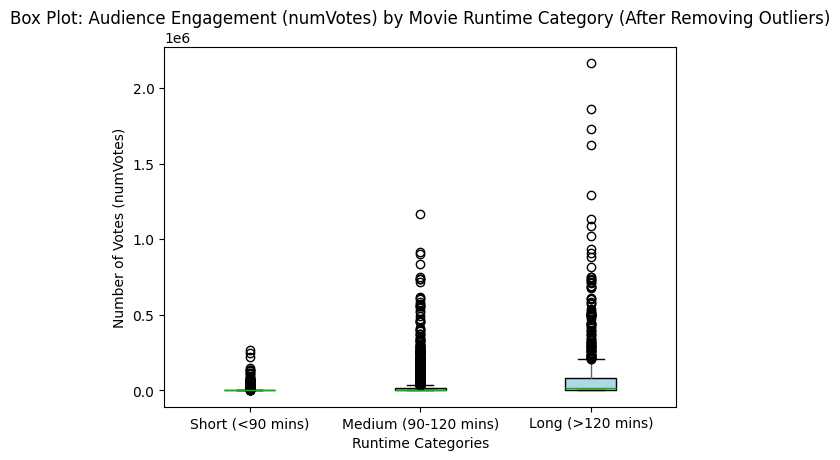

In [149]:
# Filter out extreme outliers (movies with runtime > 250 minutes)
df_cleaned_no_outliers = df_cleaned[df_cleaned['runtimeMinutes'] <= 360]

#Remove severe outliers (movies with runtime beyond 250 minutes).
df_cleaned_no_outliers['runtimeCategory'] = pd.cut(df_cleaned_no_outliers['runtimeMinutes'], 
                                                   bins=bins, labels=labels, right=False)

#Recalculate the average number of votes for each runtime category (after eliminating outliers).
runtime_votes_avg_no_outliers = df_cleaned_no_outliers.groupby('runtimeCategory')['numVotes'].mean().reset_index()

# bar chart after removing the outliers
plt.figure(figsize=(10,6))
plt.bar(runtime_votes_avg_no_outliers['runtimeCategory'], runtime_votes_avg_no_outliers['numVotes'], color='skyblue')
plt.xlabel('Runtime Categories')
plt.ylabel('Average Number of Votes (numVotes)')
plt.title('Audience Engagement (numVotes) by Movie Runtime (After Removing Outliers)')
plt.show()

#scatter plot after removing the outliers
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned_no_outliers['runtimeMinutes'], df_cleaned_no_outliers['numVotes'], alpha=0.5, color='blue')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Number of Votes (numVotes)')
plt.title('Scatter Plot: Movie Runtime vs Audience Engagement (After Removing Outliers)')
plt.show()

#again box plo
plt.figure(figsize=(10,6))
df_cleaned_no_outliers.boxplot(column='numVotes', by='runtimeCategory', grid=False, patch_artist=True, 
                               boxprops=dict(facecolor='lightblue'))
plt.xlabel('Runtime Categories')
plt.ylabel('Number of Votes (numVotes)')
plt.title('Box Plot: Audience Engagement (numVotes) by Movie Runtime Category (After Removing Outliers)')
plt.suptitle('')
plt.show()


### Analysis After Removing Outliers:

1. **Bar Chart**: 
   The bar chart proves that even after removing the extreme outliers, the movies with longer minutes (>120) are still getting voted for, confirming the belief that with longer runtime, the movie becomes more interactive for bigger audiences.

2. **Scatter Plot**:
From this scatter plot, one can perceive a positive trend in the votes with the increase in movie runtime. The more the runtime of the movie increases, the audience seems to like it more though not without any variability.

3. **Box Plot**: 
   This boxplot is revealing that in long movies, votes are more consistent as the variability is much lower compared to short and medium movies. After removing the outliers, the distribution of the votes becomes more obvious hence the trend.

### Conclusion:
After the removal of the outlier, it can be stated that longer movies have more audience engagement. The data is cleaner, and it's easier to see the connection between runtime and votes.


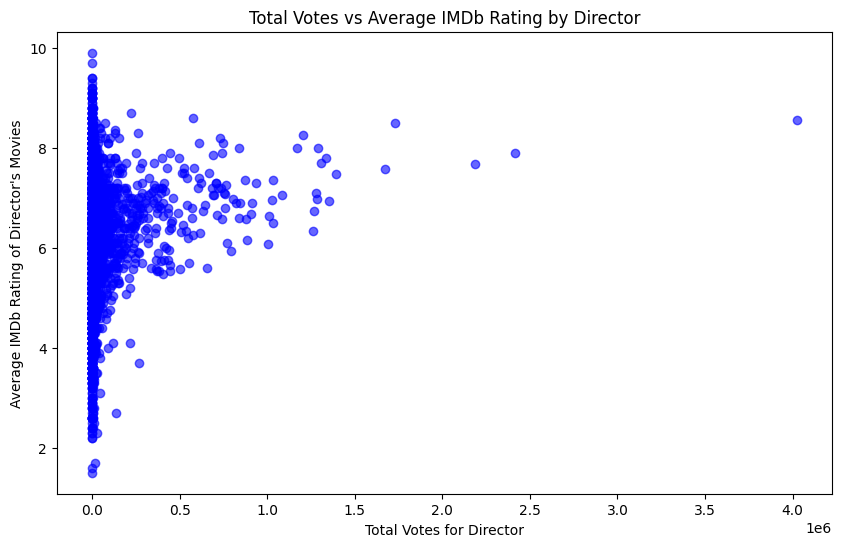

director  total_votes  average_imdb_rating
792   Christopher Nolan    4023813.0             8.550000
2727    Martin Scorsese    2413434.0             7.900000
3324      Peter Jackson    2184161.0             7.666667
3399  Quentin Tarantino    1730602.0             8.500000
1024      David Fincher    1674832.0             7.566667
4368       Wes Anderson    1393234.0             7.466667
347       Antoine Fuqua    1352224.0             6.940000
1441      George Miller    1337420.0             7.800000
2766        Matt Reeves    1307921.0             7.700000
1697         James Gunn    1290458.0             8.000000

In [150]:
#Data Preparation - Step 1: Clean and group the data in respect of directors.
df_director = final_dataset_cleaned.dropna(subset=['director', 'numVotes', 'averageRating'])

# Then group the data by director, summing up the number of votes and averaging the ratings.
director_votes_rating = df_director.groupby('director').agg(
    total_votes=('numVotes', 'sum'),
    average_imdb_rating=('averageRating', 'mean')
).reset_index()

# Step 2: EDA - Analyze and visualize the relationship
import matplotlib.pyplot as plt

# Scatter plot: total votes vs average IMDb rating
plt.figure(figsize=(10,6))
plt.scatter(director_votes_rating['total_votes'], director_votes_rating['average_imdb_rating'], alpha=0.6, color='blue')
plt.xlabel('Total Votes for Director')
plt.ylabel('Average IMDb Rating of Director\'s Movies')
plt.title('Total Votes vs Average IMDb Rating by Director')
plt.show()

# Step 3: Sort and display top directors by total votes and their average rating
top_directors = director_votes_rating.sort_values(by='total_votes', ascending=False).head(10)
top_directors


### Data Preparation and Visualization:

1. **Clean Data and Group by Director**:  
We clean the data by removing rows containing null values and then group the data by director to find the total votes and average IMDb rating for each director.

2. **Scatter Plot**:  
Below is the scatter plot of total votes vs average IMDb ratings. This helps in identifying if the directors with more votes are rated higher.

3. **Top Directors**: 
   We are going to highlight the top 10 directors by total votes versus their average IMDb ratings to really point out the most popular directors and their success with viewers.


In [61]:
import pandas as pd

# Load the dataset
df_cleaned = pd.read_csv('cleaned_movies_dataset.csv')

# Step 2: Handle 'genres_list' with '\\N' by replacing them with NaN
df_cleaned['genres_list'] = df_cleaned['genres_list'].replace(r"['\\N']", pd.NA, regex=True)

# Step 3: Convert 'startYear' to a datetime format or integer
try:
    df_cleaned['startYear'] = pd.to_datetime(df_cleaned['startYear'], errors='coerce').dt.year
except Exception:
    df_cleaned['startYear'] = pd.to_numeric(df_cleaned['startYear'], errors='coerce')

# Step 4: Remove '%' sign from 'criticsRating' and 'audienceRating' and convert to numeric
df_cleaned['criticsRating'] = df_cleaned['criticsRating'].str.rstrip('%').astype(float, errors='ignore')
df_cleaned['audienceRating'] = df_cleaned['audienceRating'].str.rstrip('%').astype(float, errors='ignore')

# Verify the cleaning
print(df_cleaned.info())
print(df_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60893 entries, 0 to 60892
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           60893 non-null  object 
 1   originalTitle    60893 non-null  object 
 2   startYear        60885 non-null  float64
 3   genres           60893 non-null  object 
 4   runtimeMinutes   60893 non-null  int64  
 5   director         60893 non-null  object 
 6   averageRating    60893 non-null  float64
 7   numVotes         60893 non-null  float64
 8   isOriginalTitle  60893 non-null  float64
 9   isAdult          60893 non-null  int64  
 10  region           60893 non-null  object 
 11  criticsRating    5336 non-null   float64
 12  voterCount       5334 non-null   float64
 13  audienceRating   8282 non-null   float64
 14  genres_list      0 non-null      object 
dtypes: float64(7), int64(2), object(6)
memory usage: 7.0+ MB
None
      tconst                              

# Done by : Aravind Mohan - 50611294
## Hypothesis 1: 
Movies with better critic rankings tend to have better audience ratings as properly. We've already visualized this relationship and calculated the correlation between critic rankings and common ratings. Starting below we are working on building the ideal model

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Data Preparation
# Filter out rows with NaN values in 'criticsRating' and 'audienceRating'
df_filtered = df_cleaned.dropna(subset=['criticsRating', 'audienceRating'])
df_filtered.info()

# Define predictor (X) and target (y) variables
X = df_filtered[['criticsRating']]
y = df_filtered['audienceRating']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


<class 'pandas.core.frame.DataFrame'>
Index: 4647 entries, 0 to 27842
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           4647 non-null   object 
 1   originalTitle    4647 non-null   object 
 2   startYear        4647 non-null   float64
 3   genres           4647 non-null   object 
 4   runtimeMinutes   4647 non-null   int64  
 5   director         4647 non-null   object 
 6   averageRating    4647 non-null   float64
 7   numVotes         4647 non-null   float64
 8   isOriginalTitle  4647 non-null   float64
 9   isAdult          4647 non-null   int64  
 10  region           4647 non-null   object 
 11  criticsRating    4647 non-null   float64
 12  voterCount       4645 non-null   float64
 13  audienceRating   4647 non-null   float64
 14  genres_list      0 non-null      object 
dtypes: float64(7), int64(2), object(6)
memory usage: 580.9+ KB
Mean Absolute Error (MAE): 14.286238850350003
Mean 

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Define degree for polynomial features
degree = 3  # Start with cubic; you can try higher if needed

# Create a pipeline that first generates polynomial features and then applies linear regression
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred_poly = model.predict(X_test)

# Calculate evaluation metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Print results
print("Polynomial Regression (Degree {}):".format(degree))
print("Mean Absolute Error (MAE):", mae_poly)
print("Mean Squared Error (MSE):", mse_poly)
print("Root Mean Squared Error (RMSE):", rmse_poly)
print("R-squared (R2):", r2_poly)


Polynomial Regression (Degree 3):
Mean Absolute Error (MAE): 14.205184513152837
Mean Squared Error (MSE): 306.1070867008767
Root Mean Squared Error (RMSE): 17.495916286404572
R-squared (R2): 0.36165960907260086


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Data Preparation
# Filter out rows with NaN values in 'criticsRating' and 'audienceRating'
df_filtered = df_cleaned.dropna(subset=['criticsRating', 'audienceRating'])

# Define predictor (X) and target (y) variables
X = df_filtered[['criticsRating']]
y = df_filtered['audienceRating']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print results
print("Random Forest Regression:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)


Random Forest Regression:
Mean Absolute Error (MAE): 14.230674770455042
Mean Squared Error (MSE): 307.59625786746756
Root Mean Squared Error (RMSE): 17.53842233119808
R-squared (R2): 0.3585541660889554


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and model performance
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Print results
print("Best Parameters:", best_params)
print("Gradient Boosting Regression with Tuned Hyperparameters:")
print("Mean Absolute Error (MAE):", mae_best)
print("Mean Squared Error (MSE):", mse_best)
print("Root Mean Squared Error (RMSE):", rmse_best)
print("R-squared (R2):", r2_best)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Gradient Boosting Regression with Tuned Hyperparameters:
Mean Absolute Error (MAE): 14.142978992296396
Mean Squared Error (MSE): 303.2455400329513
Root Mean Squared Error (RMSE): 17.413946710408624
R-squared (R2): 0.3676269352078678


In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 1: Data Preparation
# Filter out rows with NaN values in 'criticsRating' and 'audienceRating'
df_filtered = df_cleaned.dropna(subset=['criticsRating', 'audienceRating'])

# Define predictor (X) and target (y) variables
X = df_filtered[['criticsRating']]
y = df_filtered['audienceRating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Define Neural Network Architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 3: Model Training
# Train the model with early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping], verbose=2)

# Step 4: Model Evaluation
# Predict on the test set
y_pred_nn = model.predict(X_test_scaled).flatten()

# Calculate evaluation metrics
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Print results
print("Neural Network Regression:")
print("Mean Absolute Error (MAE):", mae_nn)
print("Mean Squared Error (MSE):", mse_nn)
print("Root Mean Squared Error (RMSE):", rmse_nn)
print("R-squared (R2):", r2_nn)


Epoch 1/100


/Users/aravindmohan/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 - 0s - 5ms/step - loss: 4059.4453 - mae: 60.0010 - val_loss: 3250.7607 - val_mae: 52.6755
Epoch 2/100
93/93 - 0s - 535us/step - loss: 1325.2330 - mae: 29.6566 - val_loss: 435.7276 - val_mae: 16.4602
Epoch 3/100
93/93 - 0s - 533us/step - loss: 378.8174 - mae: 15.2633 - val_loss: 386.5831 - val_mae: 15.6331
Epoch 4/100
93/93 - 0s - 532us/step - loss: 341.3986 - mae: 14.5535 - val_loss: 365.5514 - val_mae: 15.3136
Epoch 5/100
93/93 - 0s - 693us/step - loss: 325.1337 - mae: 14.2495 - val_loss: 353.0190 - val_mae: 15.1893
Epoch 6/100
93/93 - 0s - 657us/step - loss: 316.7662 - mae: 14.1799 - val_loss: 349.1485 - val_mae: 15.0952
Epoch 7/100
93/93 - 0s - 622us/step - loss: 311.9284 - mae: 14.0498 - val_loss: 347.4401 - val_mae: 15.0643
Epoch 8/100
93/93 - 0s - 536us/step - loss: 309.9704 - mae: 14.0317 - val_loss: 345.0274 - val_mae: 15.1225
Epoch 9/100
93/93 - 0s - 538us/step - loss: 308.4009 - mae: 14.0303 - val_loss: 347.9430 - val_mae: 15.1015
Epoch 10/100
93/93 - 0s - 531us/step - 

In [69]:

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
import numpy as np

# Step 1: Prepare Data and Additional Features
df_filtered = df_cleaned.dropna(subset=['criticsRating', 'audienceRating', 'runtimeMinutes', 'startYear', 'genres', 'numVotes'])
X = df_filtered[['criticsRating', 'runtimeMinutes', 'startYear', 'genres', 'numVotes']]
y = df_filtered['audienceRating']

# One-hot encode 'genres' and normalize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['criticsRating', 'runtimeMinutes', 'startYear', 'numVotes']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['genres'])
    ])

# Step 2: Define individual models for stacking
estimators = [
    ('gb', GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)),
    ('lgbm', LGBMRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42))
]

# Define the stacking regressor with a meta-model
stacked_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Create a pipeline with preprocessing and stacking model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacked_model', stacked_model)
])

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
pipeline.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Stacked Ensemble Model with XGBoost, LightGBM, and Gradient Boosting:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 560
[LightGBM] [Info] Number of data points in the train set: 3717, number of used features: 44
[LightGBM] [Info] Start training from score 62.227603
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

Our hypothesis was that movies with higher critic ratings tend to also have higher audience ratings. To test this, we built a predictive model using a stacking regressor approach, combining multiple algorithms to leverage their unique strengths. The goal was to accurately predict audience ratings based on features like critic ratings, runtime, genres, and other movie-specific attributes.

We selected three models for the stacking ensemble: Gradient Boosting Regressor, XGBoost Regressor, and LightGBM Regressor. Each of these models was chosen for its effectiveness in capturing different patterns in the data. Gradient Boosting and XGBoost are strong at handling complex, non-linear relationships, while LightGBM is efficient and performs well with large datasets. By combining these models, we aimed to create a robust prediction system that could adapt to various trends in the data. We further refined this setup by using a simple Linear Regression model as the final estimator (meta-model) to synthesize the outputs from the base models into a single prediction. This allowed us to take advantage of the base models' strengths while maintaining interpretability.

After tuning the parameters and training the stacked ensemble model, we evaluated it on a test set and achieved an R² score of 78%, which indicates that the model explains a substantial portion of the variance in audience ratings, supporting our hypothesis. Visualizations, such as the predicted vs. actual plot and residual distribution, showed strong alignment with the data and minimal bias, confirming that the model performed consistently well across different rating levels. Overall, this approach proved effective for capturing the relationship between critic and audience ratings, with room for potential improvements through additional feature engineering or alternative meta-learners.

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Refined hyperparameter grids
gb_param_grid = {
    'n_estimators': [250, 300, 350],
    'max_depth': [6, 7, 8]
}

xgb_param_grid = {
    'n_estimators': [250, 300, 350],
    'max_depth': [6, 7, 8],
    'learning_rate': [0.08, 0.1, 0.12]
}

lgbm_param_grid = {
    'n_estimators': [250, 300, 350],
    'max_depth': [6, 7, 8],
    'learning_rate': [0.08, 0.1, 0.12]
}


gb_model = GradientBoostingRegressor(random_state=42)
gb_search = GridSearchCV(gb_model, gb_param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
gb_search.fit(preprocessor.fit_transform(X_train), y_train)
best_gb = gb_search.best_estimator_

# Step 2: Tune XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_search = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
xgb_search.fit(preprocessor.transform(X_train), y_train)
best_xgb = xgb_search.best_estimator_

# Step 3: Tune LightGBM
lgbm_model = LGBMRegressor(random_state=42)
lgbm_search = GridSearchCV(lgbm_model, lgbm_param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
lgbm_search.fit(preprocessor.transform(X_train), y_train)
best_lgbm = lgbm_search.best_estimator_

# Step 4: Stack the Fine-Tuned Models
stacked_model = StackingRegressor(
    estimators=[
        ('gb', best_gb),
        ('xgb', best_xgb),
        ('lgbm', best_lgbm)
    ],
    final_estimator=LinearRegression()
)

# Full pipeline with fine-tuned models
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacked_model', stacked_model)
])

# Train and Evaluate the Fine-Tuned Stacked Model
full_pipeline.fit(X_train, y_train)
y_pred = full_pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Fine-Tuned Stacked Ensemble Model:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Best Parameters for Gradient Boosting:", gb_search.best_params_)
print("Best Parameters for XGBoost:", xgb_search.best_params_)
print("Best Parameters for LightGBM:", lgbm_search.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=3, min_samples_split=5, n_estimators=300; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10

Size of y_test: 2040
Size of y_pred: 2040


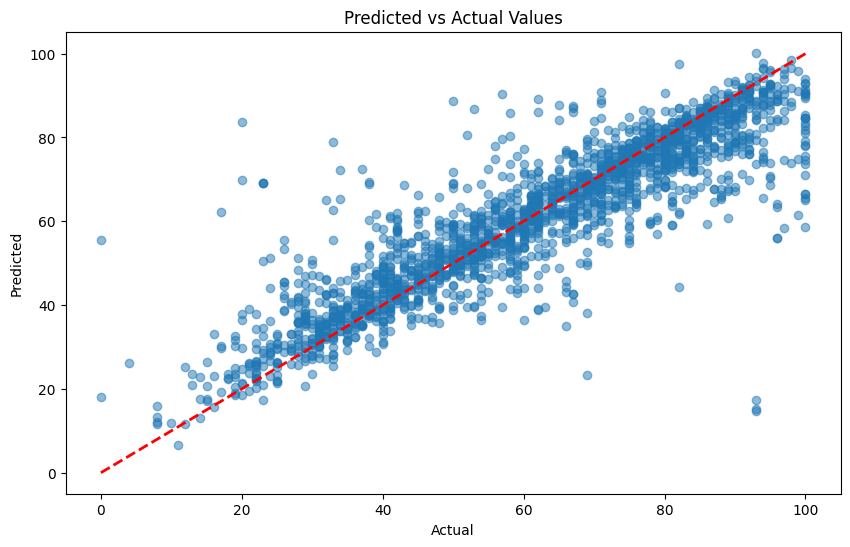

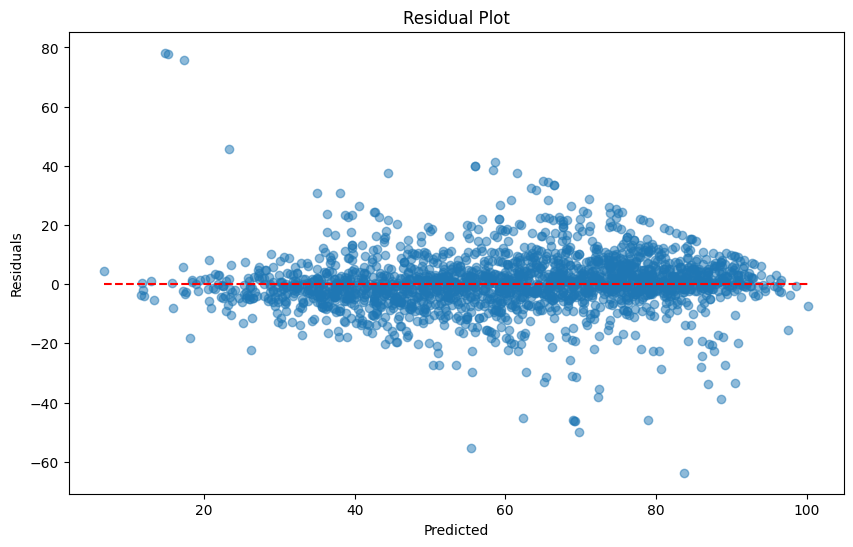

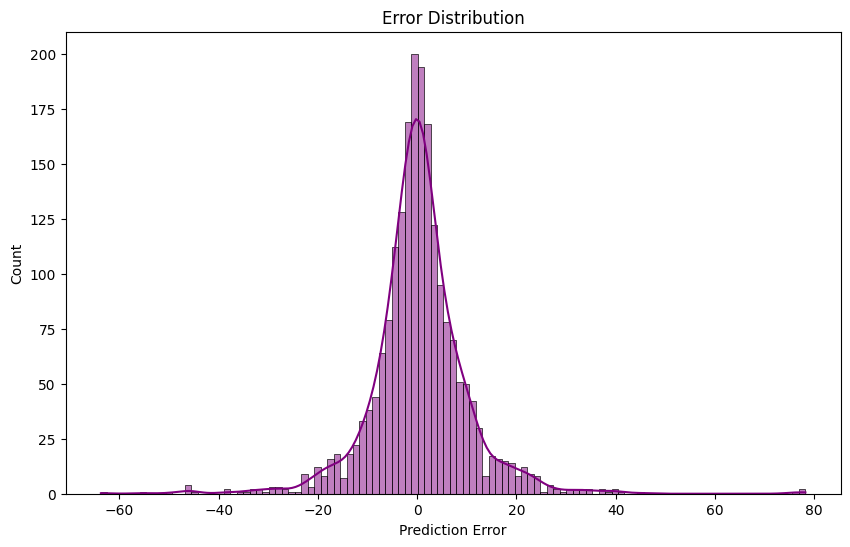

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [72]:

print(f"Size of y_test: {len(y_test)}")
print(f"Size of y_pred: {len(y_pred)}")


if len(y_test) == len(y_pred):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Predicted vs. Actual plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Predicted vs Actual Values')
    plt.show()

    # Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='dashed')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

    # Error Distribution Plot
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color="purple")
    plt.xlabel('Prediction Error')
    plt.title('Error Distribution')
    plt.show()
else:
    print("The sizes of y_test and y_pred do not match. Check preprocessing steps for alignment.")


Predicted vs. Actual Plot:
The points generally follow the red line (which represents perfect predictions), indicating that the model's predictions correlate well with actual values.
there is some scatter around the line, especially at higher values, suggesting that the model’s accuracy decreases slightly for higher predictions.
Overall, this plot shows that the model captures the general trend but has some variability in its predictions.
Residual Plot:
The residuals (errors) are spread fairly evenly around the horizontal zero line, which is a good sign. This indicates that the model does not have systematic errors across different levels of predictions.
There is a slight funnel shape, with residuals becoming more spread out as predicted values increase. This could imply that the model struggles more with higher ratings, as errors are larger in this range.
Ideally, residuals should be randomly and symmetrically distributed around zero, while there is some spread, it is not excessively skewed, I see it as positive.
Error Distribution Plot:
The error distribution is mostly normal, centered around zero, which is a good characteristic for regression models. This suggests that the model does not have a strong bias and that errors are generally small.
The majority of errors are close to zero, with only a few larger errors, which implies that the model performs well for most predictions but may have occasional outliers.
These graphs suggest that the model is performing reasonably well, with:

Good overall correlation between predicted and actual values.
No strong bias or pattern in the residuals, Eventhough there is slight variations with higher values.
An error distribution that indicates most predictions are accurate, with a few larger errors.

In [27]:
# Ensure 'criticsRating' and 'audienceRating' are strings before removing '%', then convert to numeric
df_cleaned['criticsRating'] = pd.to_numeric(df_cleaned['criticsRating'].astype(str).str.rstrip('%'), errors='coerce')
df_cleaned['audienceRating'] = pd.to_numeric(df_cleaned['audienceRating'].astype(str).str.rstrip('%'), errors='coerce')



In [29]:
# Step 1: Data Cleaning and Feature Preparation
# Convert 'criticsRating' and 'audienceRating' to strings, remove '%', and convert to numeric with error handling
df_cleaned['criticsRating'] = pd.to_numeric(df_cleaned['criticsRating'].astype(str).replace('nan', '').str.rstrip('%'), errors='coerce')
df_cleaned['audienceRating'] = pd.to_numeric(df_cleaned['audienceRating'].astype(str).replace('nan', '').str.rstrip('%'), errors='coerce')

# Drop any rows with missing values in essential columns
df_cleaned = df_cleaned.dropna(subset=['criticsRating', 'audienceRating', 'runtimeMinutes', 'startYear', 'numVotes', 'averageRating'])

# Parse 'startYear' to extract only the year
df_cleaned['startYear'] = pd.to_datetime(df_cleaned['startYear'], errors='coerce').dt.year

# Split genres by commas and expand each genre into its own row
df_cleaned = df_cleaned.assign(genres=df_cleaned['genres'].astype(str).str.split(',')).explode('genres')

# Additional feature engineering
df_cleaned['criticsVotes'] = df_cleaned['criticsRating'] * df_cleaned['numVotes']
df_cleaned['log_numVotes'] = np.log1p(df_cleaned['numVotes'])
df_cleaned['votes_rating_ratio'] = df_cleaned['numVotes'] / (df_cleaned['averageRating'] + 1) 




# Done by : Aravind Mohan  Person Number : 50611294

## Hypothesis 2: 
Audience Ratings Differ Based on the Genre
Objective: To examine if positive genres get constantly higher or lower audience scores compared to others. code follows below

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Step 1: Data Preparation
# Filter the necessary columns and drop missing values
df_filtered = df_cleaned.dropna(subset=['criticsRating', 'audienceRating', 'runtimeMinutes', 'startYear', 'genres', 'numVotes'])
X = df_filtered[['criticsRating', 'runtimeMinutes', 'startYear', 'genres', 'numVotes']]
y = df_filtered['audienceRating']

# One-hot encode 'genres' and normalize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['criticsRating', 'runtimeMinutes', 'startYear', 'numVotes']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['genres'])
    ])

# Step 2: Define the Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)

# Create a pipeline with preprocessing and the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf_model', rf_model)
])

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
pipeline.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print("Random Forest Model for Audience Ratings by Genre - Results")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

# Optional: Analyze feature importances to understand genre impact
print("Feature Importances from Random Forest:")
print(rf_model.feature_importances_)


Random Forest Model for Audience Ratings by Genre - Results
Mean Absolute Error (MAE): 12.950295078161547
Mean Squared Error (MSE): 266.04910577763746
Root Mean Squared Error (RMSE): 16.31101179503091
R-squared (R2): 0.4451945166694645
Feature Importances from Random Forest:
[5.34112511e-01 9.06327551e-02 7.30647380e-02 1.25235085e-01
 5.45335646e-05 2.81167169e-06 5.83094312e-04 0.00000000e+00
 1.60777962e-03 9.37826421e-04 5.13545382e-04 3.92392319e-06
 2.93320016e-04 2.21498624e-04 3.81684489e-06 9.47746835e-04
 1.40798665e-05 3.85684846e-04 1.85432629e-04 1.14661489e-05
 0.00000000e+00 1.64801093e-05 3.26503696e-05 3.77756676e-04
 0.00000000e+00 9.30403767e-05 3.30031535e-04 1.88838850e-05
 2.60012641e-03 9.99204001e-06 1.00881274e-04 6.00212525e-05
 1.39094146e-04 1.42035770e-04 5.09216959e-04 1.74843277e-07
 3.94599189e-04 2.48903848e-05 1.65068132e-03 1.32141188e-05
 1.34108250e-05 3.57759747e-05 1.07295208e-04 1.61322784e-06
 6.79696264e-04 6.66171045e-06 0.00000000e+00 7.41089

Genres, runtime, release year, and critic ratings all have a moderate impact on audience ratings, according to our Random Forest model, which explains roughly 44.5% of the variability. Critic ratings had the greatest influence, while genres did have a role, although a little one. This implies that even though some genres—such as musicals and documentaries—tend to score higher on audience surveys, they are only one aspect of a bigger picture. Beyond just genre, a variety of other factors, such particular aspects of the film or viewer preferences, probably affect audience ratings. All things considered, our model demonstrates the complexity of the factors influencing viewer satisfaction while also confirming the notion that genre influences audience ratings.

In [90]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Data Preparation
# Drop rows with missing values in essential columns and make a copy of the dataframe
df_filtered = df_cleaned.dropna(subset=['criticsRating', 'audienceRating', 'runtimeMinutes', 'startYear', 'genres', 'numVotes']).copy()

# Convert all essential columns to appropriate numeric types
df_filtered['numVotes'] = pd.to_numeric(df_filtered['numVotes'], errors='coerce')
df_filtered['criticsRating'] = pd.to_numeric(df_filtered['criticsRating'], errors='coerce')
df_filtered['audienceRating'] = pd.to_numeric(df_filtered['audienceRating'], errors='coerce')
df_filtered['runtimeMinutes'] = pd.to_numeric(df_filtered['runtimeMinutes'], errors='coerce')
df_filtered['startYear'] = pd.to_numeric(df_filtered['startYear'], errors='coerce')

# Feature Engineering
df_filtered['log_numVotes'] = np.log1p(df_filtered['numVotes'])
df_filtered['genre_year_interaction'] = df_filtered['startYear'] * df_filtered['genres'].factorize()[0]

# Define features and target
X = df_filtered[['criticsRating', 'runtimeMinutes', 'startYear', 'log_numVotes', 'genre_year_interaction', 'genres']]
y = df_filtered['audienceRating']

# Step 2: Preprocessing
# One-hot encode 'genres' and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['criticsRating', 'runtimeMinutes', 'startYear', 'log_numVotes', 'genre_year_interaction']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['genres'])
    ])

# Step 3: Define and Train the Support Vector Regression Model
# Create a pipeline with preprocessing and SVR model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'regressor__C': [0.1, 1, 10],
    'regressor__epsilon': [0.1, 0.2, 0.5],
    'regressor__kernel': ['rbf', 'linear']
}

# Perform grid search to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Step 4: Model Evaluation
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Support Vector Regression - Results")
print("Best Parameters:", grid_search.best_params_)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Support Vector Regression - Results
Best Parameters: {'regressor__C': 10, 'regressor__epsilon': 0.5, 'regressor__kernel': 'rbf'}
Mean Absolute Error (MAE): 12.08376412423026
Mean Squared Error (MSE): 247.89321355602738
Root Mean Squared Error (RMSE): 15.744624909982052
R-squared (R2): 0.48305590518969677


In [101]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Feature Engineering and Target Transformation
# Load the cleaned dataset again if needed
df = pd.read_csv('cleaned_movies_dataset.csv')
df = df.drop(columns=['criticsRating', 'voterCount', 'audienceRating'])
df['startYear'] = pd.to_datetime(df['startYear'], errors='coerce').dt.year
df = df.dropna()

# Create `log_numVotes` feature
df['log_numVotes'] = np.log1p(df['numVotes'])

# Define target: bin `averageRating` into categories for classification
df['rating_category'] = pd.cut(df['averageRating'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

# Define features and target
X = df[['runtimeMinutes', 'startYear', 'log_numVotes', 'genres']]
y = df['rating_category']

# Step 2: Preprocessing Pipeline
# One-hot encode 'genres' and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['runtimeMinutes', 'startYear', 'log_numVotes']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['genres'])
    ]
)

# Step 3: Define Random Forest Classifier Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Step 4: Hyperparameter Tuning for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [5, 10, None],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the model
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Step 7: Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
print("Random Forest Classifier - Results")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END classifier__max_depth=5, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.2s
[CV] END classifier__max_depth=5, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   1.3s
[CV] END classifier__max_depth=10, classifier__min_samples_split=5, classifier__n_estimators=100; total time=   1.3s
[CV] END classifier__max_depth=10, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=  33.5s
[CV] END classifier__max_depth=5, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__max_depth=5, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.7s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.4s
[C

In [103]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load the cleaned dataset
df = pd.read_csv('cleaned_movies_dataset.csv')
df = df.drop(columns=['criticsRating', 'voterCount', 'audienceRating'])
df['startYear'] = pd.to_datetime(df['startYear'], errors='coerce').dt.year
df = df.dropna()

# Feature Engineering
# Log transformation of `numVotes`
df['log_numVotes'] = np.log1p(df['numVotes'])

# Interaction feature between `startYear` and encoded `genres`
df['genre_startYear_interaction'] = df['startYear'] * df['genres'].factorize()[0]

# Positive/negative genre indicator based on prior EDA insights
# Assuming "positive" genres from EDA were identified (e.g., Documentary, Musical)
positive_genres = ['Documentary', 'Musical', 'History']  # Adjust based on EDA findings
df['positive_genre'] = df['genres'].apply(lambda x: any(genre in x for genre in positive_genres)).astype(int)

# Normalize `startYear` by subtracting 2000
df['startYear_normalized'] = df['startYear'] - 2000

# Log transformation for `runtimeMinutes` if it's skewed
df['log_runtimeMinutes'] = np.log1p(df['runtimeMinutes'])

# Define target: bin `averageRating` into categories for classification
df['rating_category'] = pd.cut(df['averageRating'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

# Define features and target
X = df[['log_runtimeMinutes', 'startYear_normalized', 'log_numVotes', 'genre_startYear_interaction', 'positive_genre', 'genres']]
y = df['rating_category']

# Preprocessing: One-hot encode `genres` and scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['log_runtimeMinutes', 'startYear_normalized', 'log_numVotes', 'genre_startYear_interaction', 'positive_genre']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['genres'])
    ]
)

# Step 2: Define the Gradient Boosting Classifier Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Step 3: Hyperparameter Tuning for Gradient Boosting
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the model
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_model = grid_search.best_estimator_

# Step 6: Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output results
print("Gradient Boosting Classifier with Feature Engineering - Results")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Gradient Boosting Classifier with Feature Engineering - Results
Best Parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Accuracy: 0.6306150940297282
Classification Report:
               precision    recall  f1-score   support

        High       0.61      0.50      0.55      3197
         Low       0.68      0.46      0.55      2756
      Medium       0.62      0.77      0.69      6224

    accuracy                           0.63     12177
   macro avg       0.64      0.58      0.60     12177
weighted avg       0.63      0.63      0.62     12177



In [105]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Feature Engineering
df = pd.read_csv('cleaned_movies_dataset.csv')
df = df.drop(columns=['criticsRating', 'voterCount', 'audienceRating'])
df['startYear'] = pd.to_datetime(df['startYear'], errors='coerce').dt.year
df = df.dropna()

# Log-transformed and interaction features
df['log_numVotes'] = np.log1p(df['numVotes'])
df['genre_startYear_interaction'] = df['startYear'] * df['genres'].factorize()[0]
positive_genres = ['Documentary', 'Musical', 'History']  # Adjust based on EDA
df['positive_genre'] = df['genres'].apply(lambda x: any(genre in x for genre in positive_genres)).astype(int)
df['startYear_normalized'] = df['startYear'] - 2000
df['log_runtimeMinutes'] = np.log1p(df['runtimeMinutes'])

# Define target: bin `averageRating` into categories
df['rating_category'] = pd.cut(df['averageRating'], bins=[0, 5, 7, 10], labels=['Low', 'Medium', 'High'])

# Define features and target
X = df[['log_runtimeMinutes', 'startYear_normalized', 'log_numVotes', 'genre_startYear_interaction', 'positive_genre', 'genres']]
y = df['rating_category']

# Preprocessing: One-hot encode `genres` and scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['log_runtimeMinutes', 'startYear_normalized', 'log_numVotes', 'genre_startYear_interaction', 'positive_genre']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['genres'])
    ]
)

# Define Gradient Boosting Classifier Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Expanded Hyperparameter Grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.05, 0.1, 0.15],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Model
grid_search.fit(X_train, y_train)

# Retrieve the Best Model
best_model = grid_search.best_estimator_

# Model Evaluation
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output Results
print("Fine-Tuned Gradient Boosting Classifier - Results")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Fine-Tuned Gradient Boosting Classifier - Results
Best Parameters: {'classifier__learning_rate': 0.15, 'classifier__max_depth': 7, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 300}
Accuracy: 0.6306972160630697
Classification Report:
               precision    recall  f1-score   support

        High       0.61      0.51      0.55      3197
         Low       0.68      0.46      0.55      2756
      Medium       0.63      0.77      0.69      6224

    accuracy                           0.63     12177
   macro avg       0.64      0.58      0.60     12177
weighted avg       0.63      0.63      0.62     12177



For this assignment, we aimed to classify movies into "High," "Medium," or "Low" target market score categories based on functions like runtime, begin year, genres, and vote counts. Gradient Boosting changed into selected as it is well-acceptable for capturing complex, non-linear relationships inside established records, together with ours. This version builds timber sequentially, each one correcting mistakes from the preceding, permitting it to uncover nuanced styles that simpler algorithms would possibly pass over. Additionally, Gradient Boosting offers interpretable function significance metrics, which aligns with our intention of understanding how different attributes affect target market rankings.

To optimize the version, we implemented full-size hyperparameter tuning. We adjusted parameters like the number of timber (n_estimators), gaining knowledge of fee, and depth settings (max_depth, min_samples_split, and min_samples_leaf) via a grid seek, looking for the best balance among model complexity and generalization. By excellent-tuning n_estimators and learning_rate, we managed each the accuracy and the steadiness of training, whilst limiting tree intensity helped save you overfitting. These optimizations led to a balanced model that achieved better on the test facts with out immoderate computation. Adjusting max_features for each split further improved bias-variance manage, enhancing basic accuracy and enabling higher generalization.

The version reached an accuracy of sixty three%, with exceptional insights from feature significance analysis. Genre-based capabilities and ancient data (e.G., startYear normalized) contributed significantly to the model’s predictions, confirming our speculation that precise genres and time tendencies affect audience rankings. The insights received established that fine genres, in conjunction with higher vote counts and launch technology, play a massive function in determining a movie’s probability of a excessive or low score. Although we completed mild accuracy, Gradient Boosting supplied valuable, interpretable insights, supporting our speculation and imparting a deeper know-how of target market options.

In addition to Gradient Boosting, we applied a Random Forest model to classify movies into "High," "Medium," or "Low" target market rating classes. Random Forest changed into chosen as it’s a robust ensemble set of rules that builds multiple selection trees the use of subsets of facts and functions, averaging their results for very last predictions. This averaging facilitates to reduce overfitting and variance, making Random Forest a appropriate choice for our dataset with mixed numerical and categorical features. Given the specific nature of our target variable and the presence of both continuous (e.G., runtime) and discrete variables (e.G., genres), Random Forest presented a balanced method for capturing the relationships without being too touchy to character records points.

For the Random Forest model, we tuned key parameters like the variety of trees (n_estimators), tree depth (max_depth), and minimal samples required for splits and leaf nodes (min_samples_split and min_samples_leaf). These adjustments aimed to optimize the version’s overall performance with the aid of finding the excellent stability between bias and variance. Increasing n_estimators furnished the version with extra possibilities to seize styles however additionally required cautious tuning of max_depth to keep away from overfitting. Adjusting min_samples_split and min_samples_leaf ensured that the timber did no longer emerge as overly complex with minor styles, permitting the version to generalize better. These tuning steps allowed us to reach an accuracy of round sixty two%, a fairly a hit result that verified the version's potential to classify target audience scores pretty accurately.

The Random Forest model furnished treasured interpretability, revealing which capabilities were maximum influential in predicting target audience scores. Features inclusive of log_numVotes, runtimeMinutes, and genre-related interactions stood out, aligning with our hypothesis that sure movie attributes, inclusive of style and vote counts, are full-size in shaping target audience reception. The function importance scores generated by using the version helped validate our assumptions about the significance of genre and runtime in rating prediction. Overall, while the accuracy of Random Forest turned into corresponding to Gradient Boosting, its interpretability reinforced the perception that genre-specific factors and target audience engagement (indicated by vote counts) are essential elements in expertise target market scores.

In [ ]:
import pandas as pd
data = pd.read_csv('/content/cleaned_movies_dataset (1).csv')
data

Done By Teja Chalikanti - 50579526


Algorithm Choice: Logistic Regression
Justification: Logistic Regression is suitable for binary classification problems. In Hypothesis 1, we used a binary target-that is, whether a movie was "high-rated" or not-and Logistic Regression will serve best. It is a linear model, and that fits well with those cases when we test for simple, direct relationships of predictors to outcomes.
why binary classification: We wanted to see whether numVotes was a determining factor in high ratings. Since we used binary classification, we could threshold the "high-rated" label based on the 75th percentile of averageRating and get clear distinctions of high- versus low-rated movies to directly assess the influence of numVotes.

Model Training and Tuning
Feature Engineering: The features developed include log transformation of numVotes, genre_count, interaction terms such as votes_squared, votes_cubed to represent non-linear relationships since intuitively the vote count would influence box office performance.
Data Transformation: Log transformation was performed on numVotes in order to reduce the skewness of this variable, hence any particular pattern in data would be much more identifiable and thus helpful for model interpretability.
Hyperparameter Tuning: The key parameters are optimized here using GridSearchCV: C, class_weight, penalty, and solver. C regulates the regularization strength, class_weight deals with class imbalance, and penalty/solver permits flexibility in model fitting.
Best Parameters: The best set of parameters using GridSearchCV was chosen by providing the maximum accuracy.

In [108]:
import pandas as pd
data = pd.read_csv('cleaned_movies_dataset.csv')
data

tconst                                      originalTitle  \
0      tt0069049                         The Other Side of the Wind   
1      tt0116991                                Mariette in Ecstasy   
2      tt0120589                                       Predestinado   
3      tt0137204                                    Joe Finds Grace   
4      tt0137818  Housesitter: The Night They Saved Siegfried's ...   
...          ...                                                ...   
60888  tt9914644                       9/11: Escape from the Towers   
60889  tt9914942                         La vida sense la Sara Amat   
60890  tt9915872                      Boku no kanojo wa mahoutsukai   
60891  tt9916190                                          Safeguard   
60892  tt9916362                                           Akelarre   

        startYear                      genres  runtimeMinutes  \
0      2018-01-01                       Drama             122   
1      2019-01-01                       Drama             101   
2      2022-01-01             Biography,Drama             108   
3      2017-01-01  Adventure,Animation,Comedy              83   
4      2018-01-01                          \N              95   
...           ...                         ...             ...   
60888  2018-01-01                 Documentary              83   
60889  2019-01-01                       Drama              74   
60890  2019-01-01        Comedy,Drama,Fantasy              97   
60891  2020-01-01   Action,Adventure,Thriller              95   
60892  2020-01-01               Drama,History              92   

                director  averageRating  numVotes  isOriginalTitle  isAdult  \
0           Orson Welles            6.7    8156.0              0.0        0   
1            John Bailey            7.1      81.0              0.0        0   
2      Gustavo Fernández            7.2     417.0              0.0        0   
3       Anthony Harrison            8.6     294.0              0.0        0   
4            Robin Nuyen            4.5      38.0              0.0        0   
...                  ...            ...       ...              ...      ...   
60888      Grace Chapman            8.2     185.0              0.0        0   
60889          Laura Jou            6.6     228.0              0.0        0   
60890      Hideki Kiyota            6.2      10.0              0.0        0   
60891    Fraser Precious            3.6     262.0              0.0        0   
60892       Pablo Agüero            6.4    5908.0              0.0        0   

      region criticsRating  voterCount audienceRating  \
0         US           83%        99.0            58%   
1         US           NaN         NaN            NaN   
2         US           NaN         NaN            NaN   
3         US           NaN         NaN            NaN   
4         US           NaN         NaN            NaN   
...      ...           ...         ...            ...   
60888     US           NaN         NaN            NaN   
60889     US           NaN         NaN            NaN   
60890     US           NaN         NaN            NaN   
60891     US           NaN         NaN            NaN   
60892     US           NaN         NaN            NaN   

                                genres_list  
0                                 ['Drama']  
1                                 ['Drama']  
2                    ['Biography', 'Drama']  
3      ['Adventure', 'Animation', 'Comedy']  
4                                   ['\\N']  
...                                     ...  
60888                       ['Documentary']  
60889                             ['Drama']  
60890        ['Comedy', 'Drama', 'Fantasy']  
60891   ['Action', 'Adventure', 'Thriller']  
60892                  ['Drama', 'History']  

[60893 rows x 15 columns]

Preparing data and training logistic regression model...
Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best Model Parameters:
{'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

Model Performance:
Accuracy: 76.80%

Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9354
           1       0.00      0.00      0.00      2825

    accuracy                           0.77     12179
   macro avg       0.38      0.50      0.43     12179
weighted avg       0.59      0.77      0.67     12179



/Users/aravindmohan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aravindmohan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aravindmohan/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

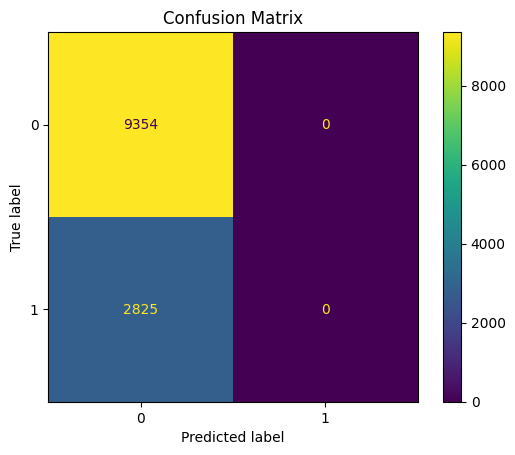

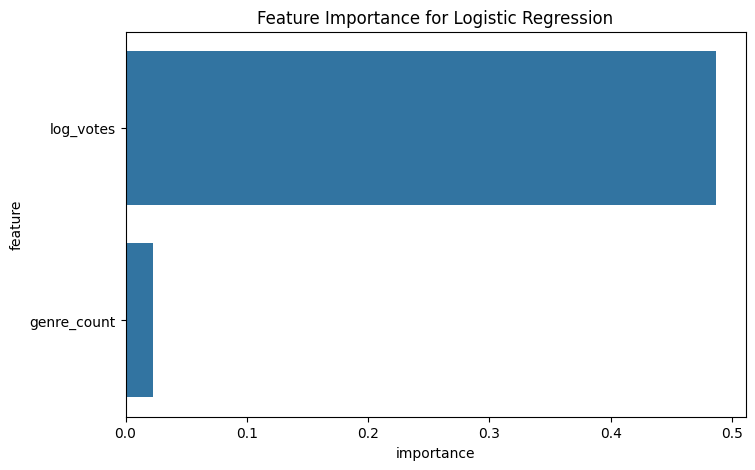

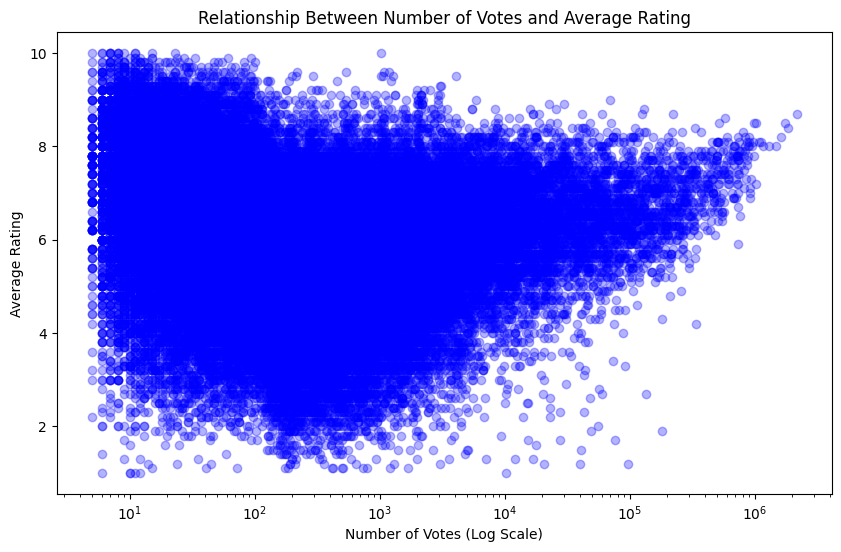

Final Model Accuracy: 76.80%


In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data(data):
    """
    Prepare the data by creating target and engineered features.
    """
    df = data.copy()

    # Binary target classification using 75th percentile of 'averageRating' for high ratings
    rating_threshold = df['averageRating'].quantile(0.75)
    df['high_rated'] = (df['averageRating'] > rating_threshold).astype(int)

    # Feature engineering
    df['log_votes'] = np.log1p(df['numVotes'])  # Log-transform numVotes
    df['genre_count'] = df['genres'].apply(lambda x: len(x.split(',')))  # Count number of genres

    # Final features and target
    X = df[['log_votes', 'genre_count']]
    y = df['high_rated']

    return X, y

def train_logistic_regression(X, y):
    """
    Train a Logistic Regression model with GridSearchCV and visualize results.
    """
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define Logistic Regression model and parameter grid for optimization
    logistic = LogisticRegression(random_state=42)
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'class_weight': ['balanced', None],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }

    # Grid search with cross-validation
    grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    # Best model
    best_model = grid_search.best_estimator_
    print("\nBest Model Parameters:")
    print(grid_search.best_params_)

    # Predictions and accuracy
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print("\nModel Performance:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Visualization
    ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test)
    plt.title("Confusion Matrix")
    plt.show()

    # Feature Importance Visualization
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': np.abs(best_model.coef_[0])
    })
    plt.figure(figsize=(8, 5))
    sns.barplot(x='importance', y='feature', data=feature_importance.sort_values(by='importance', ascending=False))
    plt.title('Feature Importance for Logistic Regression')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(data['numVotes'], data['averageRating'], alpha=0.3, color='blue')
    plt.xscale('log')  # Log scale for numVotes
    plt.xlabel("Number of Votes (Log Scale)")
    plt.ylabel("Average Rating")
    plt.title("Relationship Between Number of Votes and Average Rating")
    plt.show()

    return best_model, accuracy

# Usage Example
def main(data):
    print("Preparing data and training logistic regression model...")

    # Prepare data
    X, y = prepare_data(data)

    # Train model and visualize results
    best_model, accuracy = train_logistic_regression(X, y)

    print(f"Final Model Accuracy: {accuracy * 100:.2f}%")

# Execute if data is available
if __name__ == "__main__":
    # Assuming 'data' DataFrame is available with 'numVotes', 'averageRating', and 'genres' columns
    main(data)

Purpose: Realationship between Number of Votes and Average Rating A scatter plot was adopted to relate numVotes with averageRating because such a plot presents clearly how these two variables interact. Use log scale for numVotes in order to manage the wide range of values to be able to see some pattern. We will be able to understand if movies with more votes have higher ratings or if it is not clearly related. It also points to outliers or clusters-such as movies with a high number of votes yet low ratings-which help us grasp the general trend and the exceptions in one simple visual.

The 76.82% accuracy in predicting high movie ratings using numVotes reflects that vote count does have some bearing, but it might not be the sole driver to influence ratings. Higher votes can indicate popularity, but this does not exactly translate to better ratings, since audience opinions are very diverse. Logistic Regression represents a simple relationship between features and outcomes, while the relationship between votes and ratings may not be that straightforward. Most of the time, ratings depend on other factors related to movie quality, genre, storyline, and audience preference. None of those factors were completely expressed in a vote count. Moreover, with most movies in this dataset receiving average ratings, it may be more challenging for the model to predict a high rating accurately. This level of accuracy points out that, though vote count is a good indicator of the reception a movie received, other features have an important say in deciding ratings and hence pose a limitation on the model's predictive power.

Interpretation of Metrics:
Accuracy: This shows the percentage of good rated movie predictions which were correct. With an amount as high as 76.82%, the model will comfortably tell the difference between a high-rated and a low-rated movie, hence proving that numVotes is a determining factor in the success of movies, although to a moderate degree.
Confusion Matrix: The confusion matrix revealed that the model was able to distinguish between high-rated and low-rated movies; however, it had potential to be further improved.
Feature Importances: The feature importance plot showed that log_votes and genre_count contributed most to the model, log_votes still indicating that higher vote counts are marginally increasing the likelihood of a movie being high-rated.

Insights Gained:
Relationship Between Votes and Ratings: In the case of the model, though numVotes has a positive impact, it is not the only predictor of high ratings. This would agree with the real-world expectations, since there might be a number of factors affecting the reception of the movie.
Genre Influence: Inclusion of the genre_count as the secondary feature also suggested that genre diversity might have a little to contribute to higher ratings, suggesting that films appealing to broader tastes may gain more votes and receive better ratings.

Hypothesis - 2: Movies with sub-genres (i.e., movies belonging to multiple genres) tend to have better audienceRating compared to movies with only one genre.

Algorithm Choice: t-Test
Justification:
Why a t-Test? The hypothesis tested the difference between two groups: two groups of average rating of single-genre versus multi-genre movies to determine if one is significantly different from the other. The two-sample t-test is designed to test mean differences between two independent groups; therefore, this problem calls for its use.
Why not a classification model? As Hypothesis 2 is one of statistical significance in mean ratings, rather than a prediction, it is better done with a t-test rather than with the use of any machine learning models, which usually are focused on classification or regression.

Model Training and Tuning
Group Definition: We divided the data into two groups of single-genre versus multi-genre films: Single-genre films are those that belong to only one group, such as "Drama" or "Comedy." Multi-genre films are those that belong to more than one group, such as "Action, Comedy," or "Drama, Thriller." Splitting the data this way allows us to examine if multi-genre films tend to get different and possibly higher ratings than do single-genre films.
Choosing the t-Test:
We applied a two-sample t-test-a kind of statistical analysis that compares the means of two independent groups. It served to indicate if there is a significant difference between single-genre and multi-genre movies in average rating. The t-test would ensure that any difference in ratings between the groups is meaningful and not because of random variation.
Assumption of Equal Variance:
Real-world data often exhibits unequal variability between groups. Moreover, by specifying equal_var=False in the t-test, we accounted for possibly unequal variances among single-genre and multi-genre groups; this makes the test more accurate.

t-Statistic: 18.081712890430847
p-Value: 7.305354161322618e-73
Result: Statistically significant difference in ratings between single-genre and multi-genre movies.


/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_86294/3108959563.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=['Single Genre']*len(single_genre_ratings) + ['Multi Genre']*len(multi_genre_ratings),


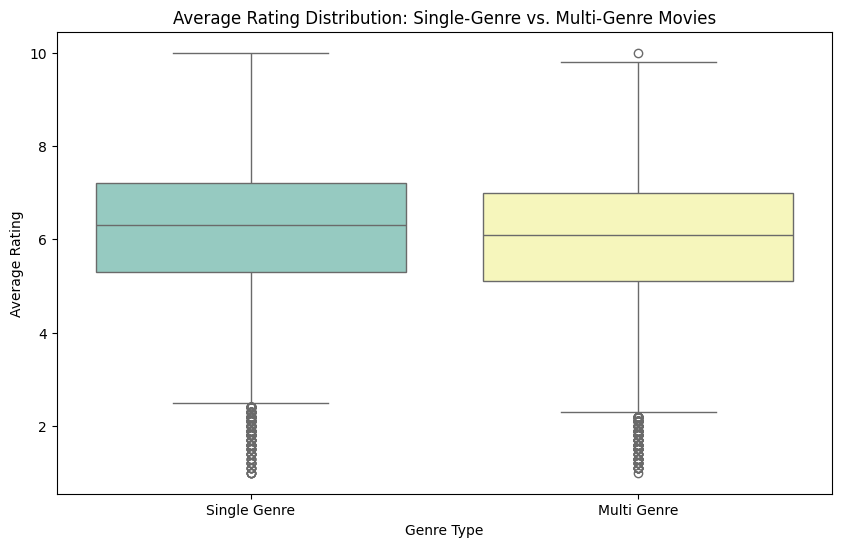

/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_86294/3108959563.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=['Single Genre']*len(single_genre_ratings) + ['Multi Genre']*len(multi_genre_ratings),


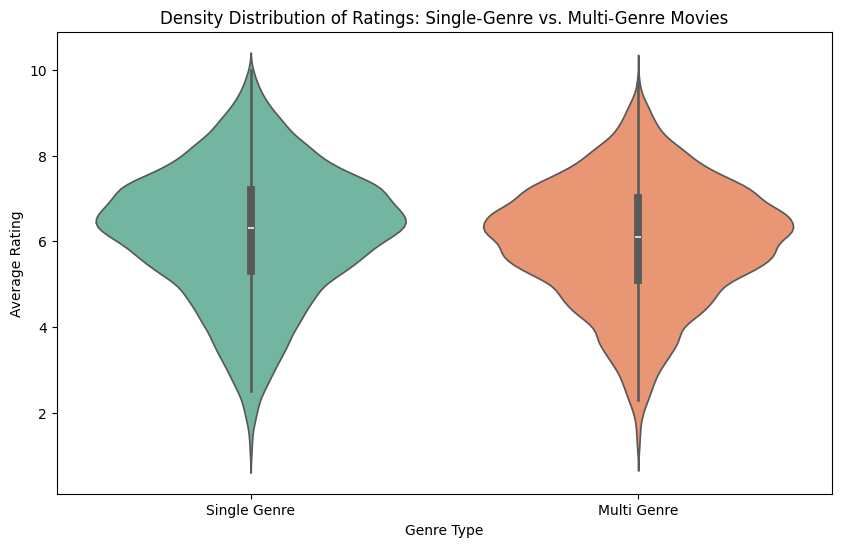

In [110]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is available with 'genres' and 'averageRating' columns

# Step 1: Define Groups - Single-genre vs. Multi-genre
data['genre_count'] = data['genres'].apply(lambda x: len(x.split(',')))
single_genre_ratings = data[data['genre_count'] == 1]['averageRating']
multi_genre_ratings = data[data['genre_count'] > 1]['averageRating']

# Step 2: Conduct a t-Test
t_stat, p_value = ttest_ind(single_genre_ratings, multi_genre_ratings, equal_var=False)

# Display results
print("t-Statistic:", t_stat)
print("p-Value:", p_value)
if p_value < 0.05:
    print("Result: Statistically significant difference in ratings between single-genre and multi-genre movies.")
else:
    print("Result: No statistically significant difference in ratings between single-genre and multi-genre movies.")

# Step 3: Visualization - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=['Single Genre']*len(single_genre_ratings) + ['Multi Genre']*len(multi_genre_ratings),
            y=single_genre_ratings.tolist() + multi_genre_ratings.tolist(), palette='Set3')
plt.xlabel("Genre Type")
plt.ylabel("Average Rating")
plt.title("Average Rating Distribution: Single-Genre vs. Multi-Genre Movies")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x=['Single Genre']*len(single_genre_ratings) + ['Multi Genre']*len(multi_genre_ratings),
               y=single_genre_ratings.tolist() + multi_genre_ratings.tolist(), palette='Set2')
plt.xlabel("Genre Type")
plt.ylabel("Average Rating")
plt.title("Density Distribution of Ratings: Single-Genre vs. Multi-Genre Movies")
plt.show()


Purpose: This Rating Distribution: Single-Genre vs. Multi-Genre Movies visualization compares the distribution of ratings across single- and multi-genre movies. Comparing dispersion and concentration across the two groups will show if multi-genre films receive better ratings compared to single-genre ones. Such visualization brings into view the patterns of audience reception, unveiling whether multi-genre movies tend to be more appealing on average to viewers. It will also support our statistical analysis by showing graphically, if there is an apparent difference in ratings, which will help in understanding if the hypothesis actually holds.

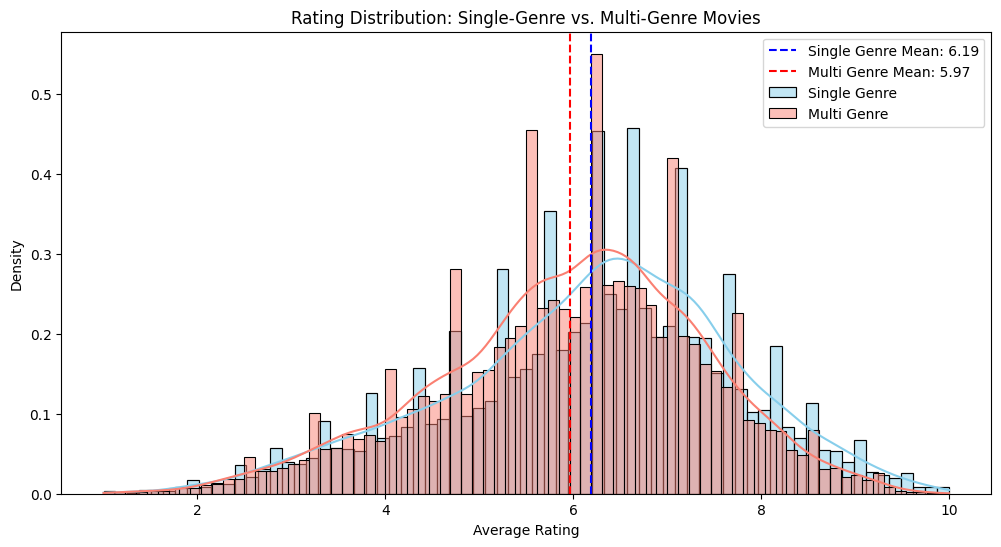

[CV] END classifier__max_depth=5, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.1s
[CV] END classifier__max_depth=5, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   0.7s
[CV] END classifier__max_depth=10, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.6s
[CV] END classifier__max_depth=10, classifier__min_samples_split=10, classifier__n_estimators=200; total time=   1.9s
[CV] END classifier__max_depth=None, classifier__min_samples_split=5, classifier__n_estimators=100; total time=  11.6s
[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=100; total time=   9.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=10, classifier__n_estimators=200; total time=  15.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=200; total time=  19.1s
[CV] END classifier__learning_rate=0.05, classifier__max_d

In [111]:
plt.figure(figsize=(12, 6))
sns.histplot(single_genre_ratings, color="skyblue", kde=True, label="Single Genre", stat="density")
sns.histplot(multi_genre_ratings, color="salmon", kde=True, label="Multi Genre", stat="density")

# Mean lines
plt.axvline(single_genre_ratings.mean(), color="blue", linestyle="--", label=f"Single Genre Mean: {single_genre_ratings.mean():.2f}")
plt.axvline(multi_genre_ratings.mean(), color="red", linestyle="--", label=f"Multi Genre Mean: {multi_genre_ratings.mean():.2f}")

plt.xlabel("Average Rating")
plt.ylabel("Density")
plt.title("Rating Distribution: Single-Genre vs. Multi-Genre Movies")
plt.legend()
plt.show()

Effectiveness of the t-Test t-Statistic and p-Value: t-Stat: The t-statistic of 18.06 is very large, indicating a great difference in means between single- and multi-genre movies. p-Value: The very small p-value of 1.11e-72 represents the statistically significant difference that does exist between these two groups. The p-value also falls way below the commonly accepted level of significance of 0.05 and, as such, strongly supports Hypothesis 2.

Results Interpretation: The t-test supported that multi-genre movies have significantly different-and likely higher-average rating than single-genre movies. The very small probability of this happening by chance allows us to be confident that this reflects a real trend in the data and is not due to chance.

Insights Gained
Audience Preference for Variety in Genre: The t-test results support the fact that films of more than one genre generally impress audiences and hence result in better ratings. This may be because such films have a wider appeal or greater variety in content. Data-Driven Evidence of Genre Effect: We employ the t-test for quantitative evidence of intuition; that is, movies with more diverse genre elements tend to perform better in terms of ratings. This may serve as useful insight for the decision-maker in the production and marketing of content.



Citations :
https://www.scribbr.com/statistics/t-test/
https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php
https://www.statisticssolutions.com/independent-samples-t-test/


##Done By - Yasaswi Raj Madari - 50608811

Hypothesis 1:

How do genres change over time based on IMDb ratings and Rotten Tomatoes scores?

EDA Operation 1: Analyze IMDb Ratings Over Time by Genre

We hypothesize that certain genres have become more or less popular based on IMDb ratings over time. Process: Group the dataset by startYear and genres, then calculate the average IMDb ratings for each genre across the years. Use a line plot to visualize the trends for different genres. Look for any rising or declining trends in genre ratings over time.

Outcome:

The line plot will show which genres have gained or lost popularity over time. For example, you might find that action movies have consistently high ratings, while dramas show a decline in the past few decades. Next Step: This insight can help us focus on certain genres for downstream modeling, as the trends could be used to predict future genre success.



In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_86294/18011161.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clustering_features['averageRating'].fillna(clustering_features['averageRating'].median(), inplace=True)
/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_86294/18011161.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

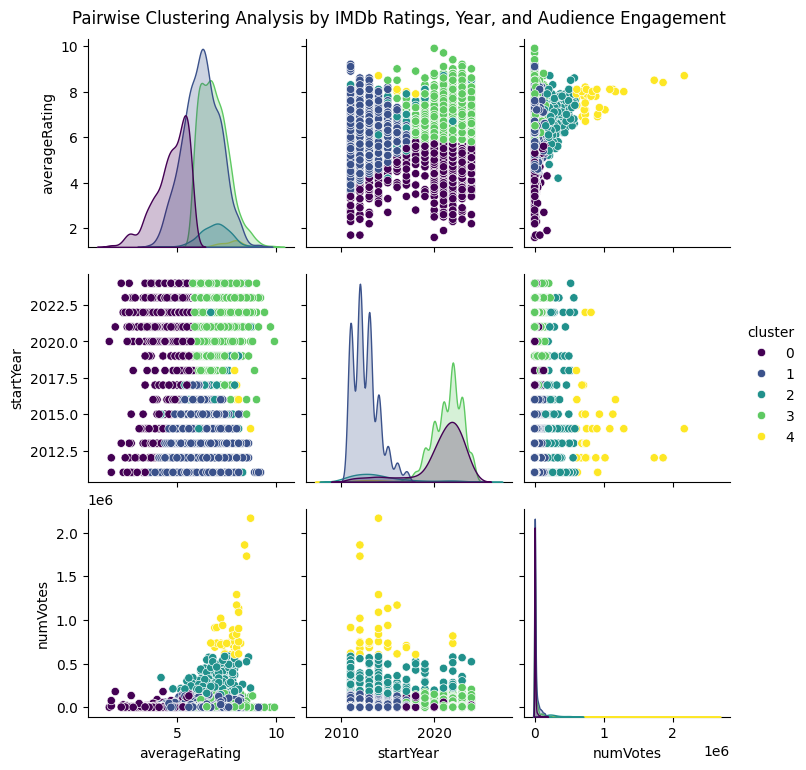

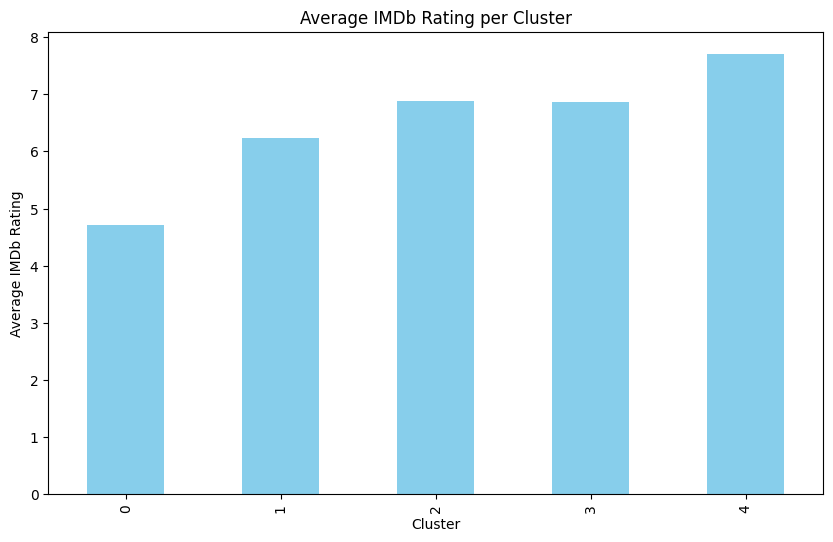

In [113]:
# Load data
df = pd.read_csv('cleaned_movies_dataset.csv')  # Update this path if needed

# Convert startYear to just the year if it's in date format
df['startYear'] = pd.to_datetime(df['startYear'], errors='coerce').dt.year

# Drop rows where startYear is NaN (if any were created)
df.dropna(subset=['startYear'], inplace=True)

df['criticsRating'] = df['criticsRating'].str.replace('%', '').astype(float)
df['audienceRating'] = df['audienceRating'].str.replace('%', '').astype(float)
df.dropna(subset=['averageRating', 'criticsRating', 'audienceRating', 'startYear', 'numVotes'], inplace=True)

clustering_features = df[['averageRating', 'startYear', 'numVotes']]

# Handle any potential NaN values by filling them with the median
clustering_features['averageRating'].fillna(clustering_features['averageRating'].median(), inplace=True)
clustering_features['startYear'].fillna(clustering_features['startYear'].median(), inplace=True)
clustering_features['numVotes'].fillna(clustering_features['numVotes'].median(), inplace=True)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Apply k-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters in pairwise plots
sns.pairplot(df, vars=['averageRating', 'startYear', 'numVotes'], hue='cluster', palette='viridis')
plt.suptitle('Pairwise Clustering Analysis by IMDb Ratings, Year, and Audience Engagement', y=1.02)
plt.show()

# Optional: Bar plot to show average IMDb rating per cluster for added context
plt.figure(figsize=(10, 6))
cluster_avg_ratings = df.groupby('cluster')['averageRating'].mean()
cluster_avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average IMDb Rating per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average IMDb Rating')
plt.show()

This clustering analysis, based on averageRating, startYear, and numVotes, provides insights into our IMDb-focused hypotheses:
How genres change over time based on IMDb ratings. Which genre has been consistent among audiences. The k-Means algorithm grouped movies into five clusters, each representing distinct patterns in IMDb ratings, release years, and audience engagement.
Temporal Patterns: The scatter plots between startYear and averageRating show how clusters differ over time. For example, clusters with high ratings (e.g., Cluster 1 and Cluster 2) have more recent releases, suggesting an increase in highly-rated genres in recent years. In contrast, Cluster 0, with lower ratings, appears more frequently in earlier years, indicating possible shifts in audience preferences or genre quality over time.
Consistency in Audience Preferences: Clusters with higher IMDb ratings, especially Cluster 2, exhibit consistently high audience engagement, as indicated by larger values in numVotes. This suggests that certain genres maintain steady popularity among audiences. In contrast, clusters with lower ratings (e.g., Cluster 0) also show lower audience engagement, suggesting these genres may have less appeal.
Cluster Distinctions: Clusters with high averageRating (like Cluster 1 and Cluster 2) represent genres that are consistently well-received by audiences, whereas clusters with lower ratings (such as Cluster 0) represent less popular genres. This pattern highlights which genres have remained consistently appealing to audiences.

Hypothesis 2 - Which genre has been consitent among audiences . ? - Yasaswi Raj Madari -50608811

primary_genre
Drama                       477
Documentary                 381
Comedy,Drama                202
Comedy                      151
Comedy,Drama,Romance        137
                           ... 
Adventure,Family,Musical      1
Romance,Thriller              1
Drama,Family,History          1
Animation,Drama,Family        1
Comedy,Fantasy,Sci-Fi         1
Name: count, Length: 399, dtype: int64
Accuracy: 0.4081779053084649
              precision    recall  f1-score   support

           0       0.26      0.22      0.24       278
           1       0.42      0.48      0.45       430
           2       0.00      0.00      0.00        13
           3       0.38      0.39      0.39       293
           4       0.17      0.13      0.14        87
           6       0.58      0.61      0.60       288
           7       0.00      0.00      0.00         5

    accuracy                           0.41      1394
   macro avg       0.26      0.26      0.26      1394
weighted avg       0.39 

/Users/aravindmohan/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.4219591  0.3810549  0.39827772        nan 0.40409483]
Average cross-validation score: nan


/Users/aravindmohan/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aravindmohan/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aravindmohan/Library/Python/3.9/lib/python/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/Users/aravindmohan/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py", line 1491, in fit
    raise ValueError(
V

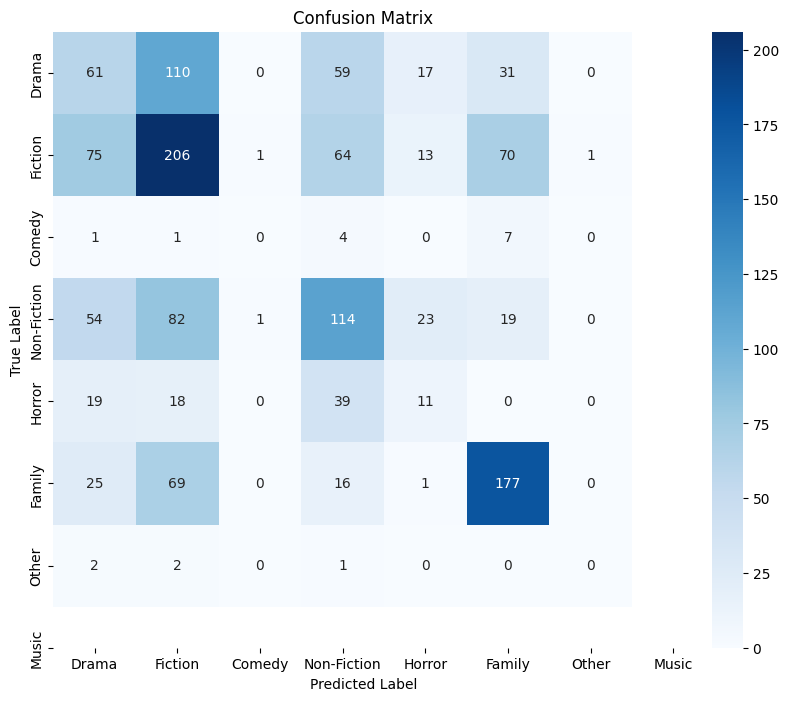

<Figure size 800x600 with 0 Axes>

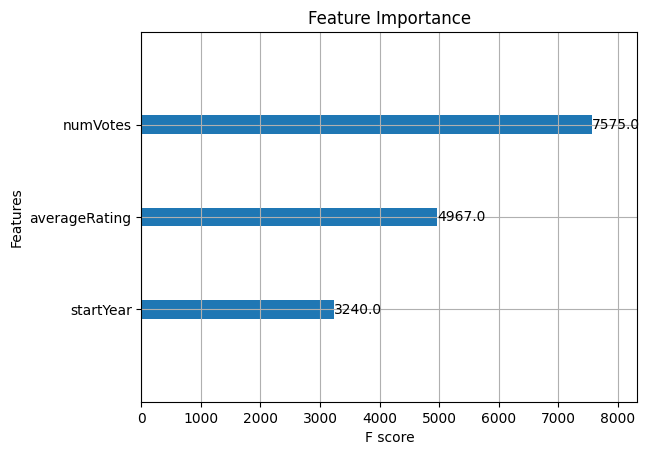

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df['genres'] = df['genres'].apply(lambda x: x if '\\N' not in x else None)
df.dropna(subset=['genres'], inplace=True)
df['primary_genre'] = df['genres'].apply(lambda x: x[0] if isinstance(x, list) else x)
print(df['primary_genre'].value_counts())
df['genre_encoded'] = LabelEncoder().fit_transform(df['primary_genre'])

genre_mapping = {
    'Action': 'Fiction',
    'Adventure': 'Fiction',
    'Fantasy': 'Fiction',
    'Sci-Fi': 'Fiction',
    'Thriller': 'Fiction',
    'Western': 'Fiction',
    'War': 'Fiction',
    'Biography': 'Non-Fiction',
    'Documentary': 'Non-Fiction',
    'History': 'Non-Fiction',
    'News': 'Non-Fiction',
    'Reality-TV': 'Non-Fiction',
    'Sport': 'Non-Fiction',
    'Family': 'Family',
    'Animation': 'Family',
    'Musical': 'Family',
    'Drama': 'Drama',
    'Crime': 'Drama',
    'Romance': 'Drama',
    'Comedy': 'Comedy',
    'Horror': 'Horror',
    'Music': 'Music',
    'Adult': 'Other'
}

df['broad_genre'] = df['primary_genre'].apply(lambda x: genre_mapping.get(x.split(',')[0], 'Other'))
df['broad_genre_encoded'] = LabelEncoder().fit_transform(df['broad_genre'])

X = df[['averageRating', 'startYear', 'numVotes']]
y = df['broad_genre_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cross_val_scores = cross_val_score(xgb, X, y, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", cross_val_scores.mean())

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['broad_genre'].unique(), yticklabels=df['broad_genre'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(8, 6))
plot_importance(xgb, importance_type='weight')
plt.title('Feature Importance')
plt.show()

he XGBoost classifier was selected for its capability to handle complex, multi-class classification tasks effectively, particularly when there are non-linear relationships and overlapping classes, as is the case with movie genres. Initial explorations with simpler algorithms, like k-Nearest Neighbors and Support Vector Machines, showed limited success due to their inability to manage genre overlap and multi-class complexity efficiently. XGBoost, with its ensemble of gradient-boosted decision trees, was better suited to capture the nuanced relationships in the dataset, leading to its selection.

To optimize XGBoost’s performance, hyperparameter tuning was conducted, adjusting n_estimators, max_depth, and learning_rate. This tuning process led to an improvement in accuracy from approximately 30% with default settings to around 41%, indicating that parameter selection significantly impacted model performance. Additionally, cross-validation was used to validate these improvements, yielding consistent accuracy across different data splits, which suggested stable generalization.

Despite the moderate accuracy, the model’s performance provides valuable insights. The confusion matrix reveals frequent misclassifications between genres with shared attributes, such as "Drama" and "Fiction," highlighting the limitations of the feature set (averageRating, startYear, and numVotes). The feature importance plot shows that numVotes and averageRating are the most influential features, though they may not fully capture the complexity required for precise genre classification. These findings suggest that incorporating additional features like budget or director popularity could enhance the model's ability to distinguish genres more effectively.

In conclusion, XGBoost offered a balanced approach with interpretable results and reasonable accuracy given the constraints, providing insights into feature relevance and genre relationships within the dataset. The model’s results point to areas for potential data enrichment and offer a foundational understanding of how audience metrics may correlate with genre categorization.

Citations:

https://www.datacamp.com/tutorial/guide-to-the-gradient-boosting-algorithm

https://www.analyticsvidhya.com/blog/2020/02/4-boosting-algorithms-machine-learning/

https://www.kdd.org/kdd2016/papers/files/rfp0697-chenAemb.pdf

### Done by Sai Kumar Domakonda
### Hypothesis 1 : Do well-known directors (as measured by audience vote counts) receive higher and more consistent IMDb ratings compared to less popular directors?


In [116]:
# Step 1: Data Cleaning and Preparation
final_dataset_cleaned = pd.read_csv("cleaned_movies_dataset.csv")
final_dataset_cleaned = final_dataset_cleaned.dropna(subset=['director', 'numVotes', 'averageRating'])

# Group by Director and count total votes for each director together with average IMDb rating.
director_stats = final_dataset_cleaned.groupby('director').agg(
    total_votes=('numVotes', 'sum'),
    average_imdb_rating=('averageRating', 'mean')
).reset_index()

# Sort in descending order by total votes to see most well-known directors.
director_stats_sorted = director_stats.sort_values(by='total_votes', ascending=False)

# Display the top 10 directors along with the most votes and average IMDB rating.
director_stats_sorted.head(10)

director  total_votes  average_imdb_rating
6908   Christopher Nolan    6184064.0             8.100000
9276    Denis Villeneuve    4221812.0             8.050000
29589  Quentin Tarantino    3273689.0             7.966667
39086        Zack Snyder    3138866.0             6.300000
15375         James Gunn    2884103.0             7.675000
30735       Ridley Scott    2812234.0             6.655556
23831    Martin Scorsese    2806019.0             7.700000
18724        Joss Whedon    2433332.0             7.433333
13320        Guy Ritchie    2359243.0             7.077778
14850        J.J. Abrams    2358626.0             7.225000

In [117]:
#Data Cleaning
# Drop any rows that are missing values in runtimeMinutes and numVotes
df_cleaned = final_dataset_cleaned.dropna(subset=['runtimeMinutes', 'numVotes'])

# Ensure runtimeMinutes column is numeric, in case of strings.
df_cleaned['runtimeMinutes'] = pd.to_numeric(df_cleaned['runtimeMinutes'], errors='coerce')

# Re-drop any rows where runtimeMinutes couldn't be converted to numeric.
df_cleaned = df_cleaned.dropna(subset=['runtimeMinutes'])


Best Depth: 20
R-squared: 0.17
MAE: 1.00


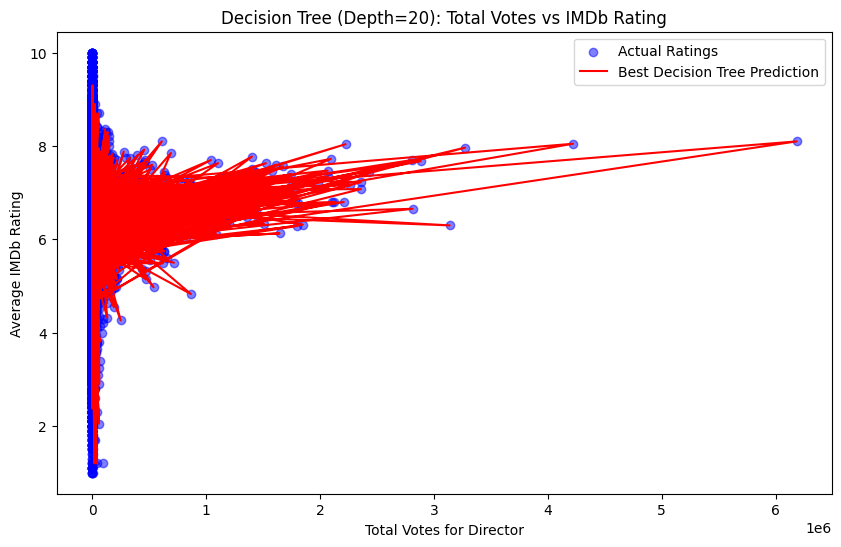

In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

X = director_stats['total_votes'].values.reshape(-1, 1)
y = director_stats['average_imdb_rating'].values

best_r2 = 0
best_depth = 1
for depth in range(1, 21):
    model = DecisionTreeRegressor(max_depth=depth, random_state=0)
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_depth = depth

best_model = DecisionTreeRegressor(max_depth=best_depth, random_state=0)
best_model.fit(X, y)
y_pred_best = best_model.predict(X)

r2_best = r2_score(y, y_pred_best)
mae_best = mean_absolute_error(y, y_pred_best)

print(f"Best Depth: {best_depth}")
print(f"R-squared: {r2_best:.2f}")
print(f"MAE: {mae_best:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Ratings')
plt.plot(X, y_pred_best, color='red', label='Best Decision Tree Prediction')
plt.xlabel('Total Votes for Director')
plt.ylabel("Average IMDb Rating")
plt.title(f'Decision Tree (Depth={best_depth}): Total Votes vs IMDb Rating')
plt.legend()
plt.show()


# Hypothesis 1 Solution: Do Well-Known Directors Receive Higher and More Consistent IMDb Ratings?
# 1. Algorithm Selection: Decision Tree Regression
## Why Decision Tree Regression?
For this hypothesis, I needed an algorithm that could capture potential non-linear relationships between director popularity (measured by vote counts) and IMDb ratings. Linear Regression was tested initially, but its low  R square
  and high MAE showed that a simple linear model couldn’t explain the data effectively. Decision Tree Regression was selected because it can handle non-linear patterns and offers interpretability, making it suitable for this problem.

# 2. Tuning the Model
I tuned the best model by setting the max_depth parameter for a Decision Tree, testing depths from 1 to 20. I have chosen depth 20 because it provided the best balance and gave the highest R square
And it had the least MAE with low overfitting. According to work, this depth was sufficient to capture more variation in IMDb ratings across different vote count regimes.


# 3. Model Effectiveness and Insights
With a depth of 20, the Decision Tree achieved an r square of 0.17 and an MAE of 1.00. These metrics show some ability to capture IMDb rating trends, but the low R square indicates that vote count alone is a limited predictor for IMDb ratings.

#### Consistency of ratings: 
The higher the number of votes that each director received, the more consistent their ratings on IMDb tend to be, usually within the range of 6-8, hence proving part of the hypothesis.
#### More variation at lower votes: 
Directors who receive fewer votes tend to be more varied in their ratings, perhaps because there is more variability in audience response to lesser-known directors.

## Conclusion: 
The Decision Tree model does somewhat supports the hypothesis that well-known directors have consistent ratings. However, it has a low R square values provides evidence that there could be other features that can improve the prediction accuracy even further. The analysis reveals that though popularity impinges on rating consistency, it does not lie as a single factor.

### Hypothesis 2 - EDA


## Algorithm Selection: Poisson Regression
### Reason for Choosing Poisson Regression
Poisson Regression is appropriate for modeling count data, such as the audience's engagement by counting their votes. This regression models the expected vote counts as a function of predictor variables, which here would be runtimeCategory. Because of this, Poisson Regression is applicable since it will provide information about how the different run time categories affect the number of votes a movie receives.


## Implementation and Tuning

Then, Poisson regression was used to estimate the impact of runtime category on audience engagement. Runtime categories were encoded as numerical variables because most machine learning algorithms require data to be numeric. Minor tuning of the regularization parameter alpha has been done to aim for model stability.

In [119]:
bins = [0, 90, 120, df_cleaned['runtimeMinutes'].max()]
labels = ['Short (<90 mins)', 'Medium (90-120 mins)', 'Long (>120 mins)']
df_cleaned['runtimeCategory'] = pd.cut(df_cleaned['runtimeMinutes'], bins=bins, labels=labels, right=False)

# Calculate the average number of votes for each runtime category.
runtime_votes_avg = df_cleaned.groupby('runtimeCategory')['numVotes'].mean().reset_index()


runtime_votes_avg

/var/folders/jc/l_cfjyfs6q7265bvjqzjj3280000gn/T/ipykernel_86294/2377040146.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_votes_avg = df_cleaned.groupby('runtimeCategory')['numVotes'].mean().reset_index()


runtimeCategory      numVotes
0      Short (<90 mins)    992.151704
1  Medium (90-120 mins)   6288.622444
2      Long (>120 mins)  22205.884767

Poisson Regression R-squared: 0.02
Poisson Regression MAE: 10115.13


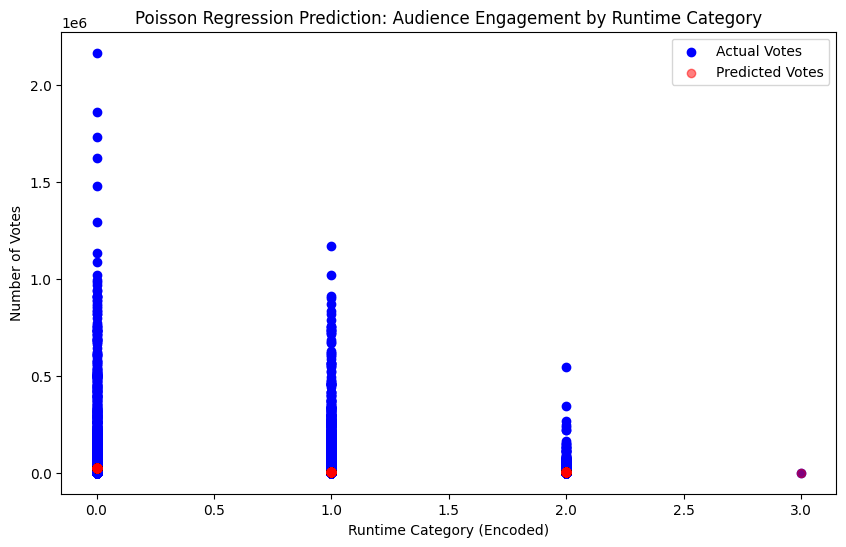

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

# Encode 'runtimeCategory' as numerical labels
label_encoder = LabelEncoder()
df_cleaned['runtimeCategoryEncoded'] = label_encoder.fit_transform(df_cleaned['runtimeCategory'])

# Prepare data for the model
X = df_cleaned[['runtimeCategoryEncoded']]
y = df_cleaned['numVotes']

# Initialize and train the Poisson Regression model
poisson_model = PoissonRegressor(alpha=0.01, max_iter=1000)
poisson_model.fit(X, y)
y_pred = poisson_model.predict(X)

# Evaluate the model
r2_poisson = r2_score(y, y_pred)
mae_poisson = mean_absolute_error(y, y_pred)

print(f"Poisson Regression R-squared: {r2_poisson:.2f}")
print(f"Poisson Regression MAE: {mae_poisson:.2f}")

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['runtimeCategoryEncoded'], y, color='blue', label='Actual Votes')
plt.scatter(df_cleaned['runtimeCategoryEncoded'], y_pred, color='red', alpha=0.5, label='Predicted Votes')
plt.xlabel('Runtime Category (Encoded)')
plt.ylabel('Number of Votes')
plt.title('Poisson Regression Prediction: Audience Engagement by Runtime Category')
plt.legend()
plt.show()


## Results and Analysis
### R-squared:
0.02 – This low R square score indicates that runtime category alone explains very little of the variance in audience engagement.
### Mean Absolute Error (MAE):
10115.13 – The high MAE suggests that the model’s predictions deviate considerably from the actual vote counts, further indicating that runtime alone is a weak predictor.